#### <b>Training Demo <br> Physics-Informed Deformable Gaussian Splatting: Towards Unified Constitutive Laws for Time-Evolving Material Field</b>
To aid the reviewers’ comprehension of the code structure, we include a training-demo Jupyter Notebook that illustrates the end-to-end pipeline. This demo is executed within the full codebase environment and presents representative results produced by the complete training implementation. For review purposes, only the executed outputs are preserved to demonstrate the training workflow.


In [1]:
pip install ./submodules/flow-based-diff-gaussian-rasterization

Processing ./submodules/flow-based-diff-gaussian-rasterization
  Preparing metadata (setup.py) ... done
  Created wheel for flow-based-diff-gaussian-rasterization: filename=flow_based_diff_gaussian_rasterization-0.0.0-cp38-cp38-linux_x86_64.whl size=4454179 sha256=6a9ff6e5ffa4143c7dd8c0a8690b9b0a37271eea064dda6c19d5bbe2c249a631
  Stored in directory: /root/.cache/pip/wheels/51/56/7b/7c0a762972af0a340f5cfa3b509f578bf729db50a5b4713606
Successfully built flow-based-diff-gaussian-rasterization
  Attempting uninstall: flow-based-diff-gaussian-rasterization
    Found existing installation: flow-based-diff-gaussian-rasterization 0.0.0
    Uninstalling flow-based-diff-gaussian-rasterization-0.0.0:
      Successfully uninstalled flow-based-diff-gaussian-rasterization-0.0.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sys
import os
import torch
from argparse import ArgumentParser

# ✅ Import the main training module
import train_pidg
from arguments import ModelParams, PipelineParams, OptimizationParams, merge_config
from utils.general_utils import safe_state

# ✅ Create parser and register all arguments (same as train_PIDG_sg_150.py)
parser = ArgumentParser()
lp = ModelParams(parser)
op = OptimizationParams(parser)
pp = PipelineParams(parser)
parser.add_argument('--ip', type=str, default="127.0.0.1")
parser.add_argument('--conf', type=str, default=None)
parser.add_argument('--port', type=int, default=6009)
parser.add_argument('--detect_anomaly', action='store_true', default=False)
parser.add_argument("--test_iterations", nargs="+", type=int,
                    default=[5000, 6000, 7000] + list(range(10000, 50001, 1000)))
parser.add_argument("--save_iterations", nargs="+", type=int, default=[5000, 10000, 20000, 30000, 40000])
parser.add_argument("--quiet", action="store_true")

# ✅ Simulate command-line arguments (equivalent to CLI execution)
sys.argv = [
    "train_pidg.py",
    "-s", "/opt/data/private/datasets/HyperNeRF/vrig/chicken-single",
    "-m", "./outputs/HyperNeRF-pidg/vrig/chicken-single",
    "--conf", "./arguments/hypernerf/vrig_chicken.py"
]

# ✅ Parse arguments
args = parser.parse_args()
args.save_iterations.append(args.iterations)

# ✅ Load config file (if provided)
if args.conf is not None and os.path.exists(args.conf):
    print("📄 Using Config File:", args.conf)
    args = merge_config(args, args.conf)
else:
    print("⚠️ [WARNING] Using default config. No --conf file found.")

# ✅ Set random seed and device
safe_state(args.quiet)
args.data_device = "cuda:0" if args.data_device == 'cuda' else args.data_device
torch.cuda.set_device(args.data_device)

# ✅ Print training info
print("\n🚀 Starting PIDG training with the following config:")
print(f"📂 Dataset path     : {args.source_path}")
print(f"💾 Output model path: {args.model_path}")
print(f"⚙️  Training iterations: {args.iterations}")
print(f"📑 Config file      : {args.conf}")
print(f"💻 Device           : {args.data_device}")
print(f"🧪 Test iters       : {args.test_iterations[:5]} ...")
print(f"💾 Save iters       : {args.save_iterations[:5]} ...")

# ✅ Extract parsed arguments and start training
train_pidg.training(
    lp.extract(args),
    op.extract(args),
    pp.extract(args),
    args.test_iterations,
    args.save_iterations
)


Detected CUDA files, patching ldflags
Emitting ninja build file ./tmp_build/build.ninja...
/opt/data/private/envs/PIDG/lib/python3.8/site-packages/torch/utils/cpp_extension.py:1965: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module _hash_encoder...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.


Loading extension module _hash_encoder...
/opt/data/private/projects/Dynamic-Reconstruction/Ours-Projects/Flow-Based-Module/PIDG_final/hashencoder/hashgrid.py:16: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.half)
/opt/data/private/projects/Dynamic-Reconstruction/Ours-Projects/Flow-Based-Module/PIDG_final/hashencoder/hashgrid.py:57: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad):
/opt/data/private/envs/PIDG/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/data/private/envs/PIDG/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum

📄 Using Config File: ./arguments/hypernerf/vrig_chicken.py

🚀 Starting PIDG training with the following config: [04/08 20:47:12]
📂 Dataset path     : /opt/data/private/datasets/HyperNeRF/vrig/chicken-single [04/08 20:47:12]
💾 Output model path: ./outputs/HyperNeRF-pidg/vrig/chicken-single [04/08 20:47:12]
⚙️  Training iterations: 40000 [04/08 20:47:12]
📑 Config file      : ./arguments/hypernerf/vrig_chicken.py [04/08 20:47:12]
💻 Device           : cuda:0 [04/08 20:47:12]
🧪 Test iters       : [5000, 6000, 7000, 10000, 11000] ... [04/08 20:47:12]
💾 Save iters       : [5000, 10000, 20000, 30000, 40000] ... [04/08 20:47:12]
Output folder: ./outputs/HyperNeRF-pidg/vrig/chicken-single [04/08 20:47:12]
Found dataset.json file, assuming Nerfies data set! [04/08 20:47:13]
Reading Nerfies Info [04/08 20:47:13]
Find sfm point cloud: /opt/data/private/datasets/HyperNeRF/vrig/chicken-single/points3d.ply [04/08 20:47:33]
Load sfm point cloud from: /opt/data/private/datasets/HyperNeRF/vrig/chicken-si

Training progress:   3%|██▋                                                                                              | 1090/40000 [00:43<37:45, 17.17it/s, Loss=0.1372817, pts=18774, reg=0.01234]

Total Gaussians: 18774 
Dynamic: 18774 [04/08 20:57:53]
Ratio: 1.0 [04/08 20:57:53]


Training progress:   3%|██▉                                                                                              | 1190/40000 [00:51<31:40, 20.42it/s, Loss=0.1459862, pts=11497, reg=0.02050]

Total Gaussians: 11497 
Dynamic: 11497 [04/08 20:58:01]
Ratio: 1.0 [04/08 20:58:01]


Training progress:   3%|███▏                                                                                             | 1290/40000 [00:58<28:55, 22.31it/s, Loss=0.1302655, pts=11463, reg=0.02189]

Total Gaussians: 11463 
Dynamic: 11463 [04/08 20:58:08]
Ratio: 1.0 [04/08 20:58:08]


Training progress:   3%|███▎                                                                                             | 1390/40000 [01:05<29:05, 22.12it/s, Loss=0.1308051, pts=11803, reg=0.01016]

Total Gaussians: 11803 
Dynamic: 11803 [04/08 20:58:15]
Ratio: 1.0 [04/08 20:58:15]


Training progress:   4%|███▌                                                                                             | 1490/40000 [01:12<28:25, 22.59it/s, Loss=0.1091993, pts=12553, reg=0.00918]

Total Gaussians: 12553 
Dynamic: 12553 [04/08 20:58:22]
Ratio: 1.0 [04/08 20:58:22]


Training progress:   4%|███▊                                                                                             | 1590/40000 [01:19<27:34, 23.22it/s, Loss=0.1137187, pts=13480, reg=0.01266]

Total Gaussians: 13480 
Dynamic: 13480 [04/08 20:58:28]
Ratio: 1.0 [04/08 20:58:28]


Training progress:   4%|████                                                                                             | 1690/40000 [01:26<27:26, 23.27it/s, Loss=0.1129472, pts=14685, reg=0.00940]

Total Gaussians: 14685 
Dynamic: 14685 [04/08 20:58:35]
Ratio: 1.0 [04/08 20:58:35]


Training progress:   4%|████▎                                                                                            | 1790/40000 [01:32<27:10, 23.43it/s, Loss=0.1093188, pts=16102, reg=0.01156]

Total Gaussians: 16102 
Dynamic: 16102 [04/08 20:58:42]
Ratio: 1.0 [04/08 20:58:42]


Training progress:   5%|████▌                                                                                            | 1890/40000 [01:39<28:15, 22.48it/s, Loss=0.1152554, pts=17718, reg=0.00802]

Total Gaussians: 17718 
Dynamic: 17718 [04/08 20:58:49]
Ratio: 1.0 [04/08 20:58:49]


Training progress:   5%|████▊                                                                                            | 1990/40000 [01:47<28:29, 22.23it/s, Loss=0.1005124, pts=19537, reg=0.01322]

[Iter 2000] cauchy momentum loss = 2.491e-04 [04/08 20:58:56]
[Iter 2000] velocity mean = [-0.03608827  0.00140944 -0.04167951] [04/08 20:58:56]
[Iter 2000] stress  mean = [ 0.06499065 -0.15361793 -0.10672115  0.11632439 -0.07194922  0.04990116] [04/08 20:58:56]
Total Gaussians: 19537 
Dynamic: 19537 [04/08 20:58:56]
Ratio: 1.0 [04/08 20:58:56]


Training progress:   5%|█████                                                                                            | 2090/40000 [01:56<39:50, 15.86it/s, Loss=0.1149878, pts=21476, reg=0.00717]

Total Gaussians: 21476 
Dynamic: 21476 [04/08 20:59:06]
Ratio: 1.0 [04/08 20:59:06]


Training progress:   5%|█████▎                                                                                           | 2190/40000 [02:04<33:00, 19.09it/s, Loss=0.0997993, pts=20054, reg=0.01485]

Total Gaussians: 20054 
Dynamic: 20054 [04/08 20:59:14]
Ratio: 1.0 [04/08 20:59:14]


Training progress:   6%|█████▌                                                                                           | 2290/40000 [02:12<31:28, 19.96it/s, Loss=0.0984137, pts=21178, reg=0.00925]

Total Gaussians: 21178 
Dynamic: 21178 [04/08 20:59:22]
Ratio: 1.0 [04/08 20:59:22]


Training progress:   6%|█████▊                                                                                           | 2390/40000 [02:20<31:11, 20.10it/s, Loss=0.1076636, pts=22937, reg=0.00880]

Total Gaussians: 22937 
Dynamic: 22937 [04/08 20:59:30]
Ratio: 1.0 [04/08 20:59:30]


Training progress:   6%|██████                                                                                           | 2490/40000 [02:28<30:37, 20.42it/s, Loss=0.1011212, pts=25024, reg=0.00877]

Total Gaussians: 25024 
Dynamic: 25024 [04/08 20:59:38]
Ratio: 1.0 [04/08 20:59:38]


Training progress:   6%|██████▎                                                                                          | 2590/40000 [02:36<31:34, 19.74it/s, Loss=0.1027039, pts=27254, reg=0.00943]

Total Gaussians: 27254 
Dynamic: 27254 [04/08 20:59:46]
Ratio: 1.0 [04/08 20:59:46]


Training progress:   7%|██████▌                                                                                          | 2690/40000 [02:44<31:04, 20.01it/s, Loss=0.0974842, pts=29636, reg=0.00617]

Total Gaussians: 29636 
Dynamic: 29636 [04/08 20:59:53]
Ratio: 1.0 [04/08 20:59:53]


Training progress:   7%|██████▊                                                                                          | 2790/40000 [02:52<31:40, 19.58it/s, Loss=0.1028550, pts=32169, reg=0.00913]

Total Gaussians: 32169 
Dynamic: 32169 [04/08 21:00:02]
Ratio: 1.0 [04/08 21:00:02]


Training progress:   7%|███████                                                                                          | 2890/40000 [03:00<32:17, 19.15it/s, Loss=0.0985574, pts=34810, reg=0.01023]

Total Gaussians: 34810 
Dynamic: 34810 [04/08 21:00:10]
Ratio: 1.0 [04/08 21:00:10]


Training progress:   7%|███████▎                                                                                         | 2990/40000 [03:08<32:56, 18.73it/s, Loss=0.0978179, pts=37684, reg=0.00997]

[Iter 3000] cauchy momentum loss = 5.910e-05 [04/08 21:00:18]
[Iter 3000] velocity mean = [-0.05097664 -0.00381781 -0.04473662] [04/08 21:00:18]
[Iter 3000] stress  mean = [ 0.07085216 -0.14882241 -0.09927518  0.11986439 -0.08513921  0.03893508] [04/08 21:00:18]
Total Gaussians: 37684 
Dynamic: 37684 [04/08 21:00:18]
Ratio: 1.0 [04/08 21:00:18]


Training progress:   8%|███████▍                                                                                         | 3090/40000 [03:18<40:41, 15.12it/s, Loss=0.1075975, pts=40584, reg=0.00644]

Total Gaussians: 40584 
Dynamic: 40584 [04/08 21:00:28]
Ratio: 1.0 [04/08 21:00:28]


Training progress:   8%|███████▋                                                                                         | 3190/40000 [03:27<36:08, 16.98it/s, Loss=0.0939984, pts=37897, reg=0.00667]

Total Gaussians: 37897 
Dynamic: 37897 [04/08 21:00:36]
Ratio: 1.0 [04/08 21:00:36]


Training progress:   8%|███████▉                                                                                         | 3290/40000 [03:35<34:41, 17.64it/s, Loss=0.0935321, pts=40316, reg=0.00652]

Total Gaussians: 40316 
Dynamic: 40316 [04/08 21:00:45]
Ratio: 1.0 [04/08 21:00:45]


Training progress:   8%|████████▏                                                                                        | 3390/40000 [03:43<34:12, 17.84it/s, Loss=0.0947344, pts=43200, reg=0.00868]

Total Gaussians: 43200 
Dynamic: 43200 [04/08 21:00:53]
Ratio: 1.0 [04/08 21:00:53]


Training progress:   9%|████████▍                                                                                        | 3490/40000 [03:52<34:27, 17.66it/s, Loss=0.0973512, pts=46332, reg=0.00765]

Total Gaussians: 46332 
Dynamic: 46332 [04/08 21:01:01]
Ratio: 1.0 [04/08 21:01:01]


Training progress:   9%|████████▋                                                                                        | 3590/40000 [04:00<35:15, 17.21it/s, Loss=0.0888161, pts=49616, reg=0.00597]

Total Gaussians: 49616 
Dynamic: 49616 [04/08 21:01:10]
Ratio: 1.0 [04/08 21:01:10]


Training progress:   9%|████████▉                                                                                        | 3690/40000 [04:09<36:00, 16.80it/s, Loss=0.0853141, pts=53060, reg=0.00617]

Total Gaussians: 53060 
Dynamic: 53060 [04/08 21:01:18]
Ratio: 1.0 [04/08 21:01:18]


Training progress:   9%|█████████▏                                                                                       | 3790/40000 [04:18<37:23, 16.14it/s, Loss=0.0826728, pts=56699, reg=0.00710]

Total Gaussians: 56699 
Dynamic: 56699 [04/08 21:01:27]
Ratio: 1.0 [04/08 21:01:27]


Training progress:  10%|█████████▍                                                                                       | 3890/40000 [04:27<38:03, 15.82it/s, Loss=0.0869610, pts=60268, reg=0.00678]

Total Gaussians: 60268 
Dynamic: 60268 [04/08 21:01:37]
Ratio: 1.0 [04/08 21:01:37]


Training progress:  10%|█████████▋                                                                                       | 3990/40000 [04:36<38:53, 15.43it/s, Loss=0.0925217, pts=63910, reg=0.00609]

[Iter 4000] cauchy momentum loss = 2.114e-05 [04/08 21:01:46]
[Iter 4000] velocity mean = [-0.05975731 -0.0001667  -0.05142455] [04/08 21:01:46]
[Iter 4000] stress  mean = [ 0.0762833  -0.14594103 -0.09601399  0.12200997 -0.09077688  0.03330413] [04/08 21:01:46]
Total Gaussians: 63910 
Dynamic: 63910 [04/08 21:01:46]
Ratio: 1.0 [04/08 21:01:46]


Training progress:  10%|█████████▉                                                                                       | 4090/40000 [04:47<47:05, 12.71it/s, Loss=0.0979369, pts=67710, reg=0.00593]

Total Gaussians: 67710 
Dynamic: 67710 [04/08 21:01:57]
Ratio: 1.0 [04/08 21:01:57]


Training progress:  10%|██████████▏                                                                                      | 4190/40000 [04:57<41:20, 14.44it/s, Loss=0.0896808, pts=60817, reg=0.00694]

Total Gaussians: 60817 
Dynamic: 60817 [04/08 21:02:06]
Ratio: 1.0 [04/08 21:02:06]


Training progress:  11%|██████████▍                                                                                      | 4290/40000 [05:06<40:36, 14.66it/s, Loss=0.0860272, pts=63939, reg=0.00504]

Total Gaussians: 63939 
Dynamic: 63939 [04/08 21:02:16]
Ratio: 1.0 [04/08 21:02:16]


Training progress:  11%|██████████▋                                                                                      | 4390/40000 [05:16<40:54, 14.51it/s, Loss=0.0849712, pts=67862, reg=0.00488]

Total Gaussians: 67862 
Dynamic: 67862 [04/08 21:02:26]
Ratio: 1.0 [04/08 21:02:26]


Training progress:  11%|██████████▉                                                                                      | 4490/40000 [05:26<41:53, 14.13it/s, Loss=0.0922873, pts=71849, reg=0.00851]

Total Gaussians: 71849 
Dynamic: 71849 [04/08 21:02:35]
Ratio: 1.0 [04/08 21:02:35]


Training progress:  11%|███████████▏                                                                                     | 4590/40000 [05:35<42:02, 14.04it/s, Loss=0.0826069, pts=76055, reg=0.00580]

Total Gaussians: 76055 
Dynamic: 76055 [04/08 21:02:45]
Ratio: 1.0 [04/08 21:02:45]


Training progress:  12%|███████████▎                                                                                     | 4690/40000 [05:45<43:13, 13.62it/s, Loss=0.0838480, pts=80533, reg=0.00476]

Total Gaussians: 80533 
Dynamic: 80533 [04/08 21:02:55]
Ratio: 1.0 [04/08 21:02:55]


Training progress:  12%|███████████▌                                                                                     | 4790/40000 [05:56<44:40, 13.14it/s, Loss=0.0846877, pts=84913, reg=0.00558]

Total Gaussians: 84913 
Dynamic: 84913 [04/08 21:03:06]
Ratio: 1.0 [04/08 21:03:06]


Training progress:  12%|███████████▊                                                                                     | 4890/40000 [06:07<46:07, 12.69it/s, Loss=0.0816544, pts=89570, reg=0.00447]

Total Gaussians: 89570 
Dynamic: 89570 [04/08 21:03:16]
Ratio: 1.0 [04/08 21:03:16]


Training progress:  12%|████████████                                                                                     | 4990/40000 [06:17<46:24, 12.57it/s, Loss=0.0844438, pts=94302, reg=0.00495]

[Iter 5000] cauchy momentum loss = 1.052e-05 [04/08 21:03:27]
[Iter 5000] velocity mean = [-0.0645527   0.00728518 -0.05857039] [04/08 21:03:27]
[Iter 5000] stress  mean = [ 0.0769864  -0.14467475 -0.09233667  0.12126869 -0.09044456  0.03179115] [04/08 21:03:27]
Total Gaussians: 94302 
Dynamic: 94302 [04/08 21:03:27]
Ratio: 1.0 [04/08 21:03:27]


Training progress:  12%|███████████▉                                                                                   | 5000/40000 [06:21<1:32:56,  6.28it/s, Loss=0.0792694, pts=94302, reg=0.00548]


[ITER 5000] Evaluating test: L1 0.0298 PSNR 25.34 SSIM 0.7414 MS-SSIM 0.8613 LPIPS 0.3982 [04/08 21:03:33]

[ITER 5000] Evaluating train: L1 0.0282 PSNR 25.79 SSIM 0.7632 MS-SSIM 0.8654 LPIPS 0.3875 [04/08 21:03:35]
Best [5000]: PSNR: 25.34, SSIM: 0.7414, MS-SSIM: 0.8613, LPIPS: 0.3982 [04/08 21:03:36]

[ITER 5000] Saving Gaussians [04/08 21:03:36]


Training progress:  13%|████████████                                                                                   | 5090/40000 [06:40<1:04:42,  8.99it/s, Loss=0.0760811, pts=99076, reg=0.00375]

Total Gaussians: 99076 
Dynamic: 99076 [04/08 21:03:50]
Ratio: 1.0 [04/08 21:03:50]


Training progress:  13%|████████████▌                                                                                    | 5190/40000 [06:51<48:12, 12.04it/s, Loss=0.0908483, pts=88835, reg=0.00599]

Total Gaussians: 88835 
Dynamic: 88835 [04/08 21:04:01]
Ratio: 1.0 [04/08 21:04:01]


Training progress:  13%|████████████▊                                                                                    | 5290/40000 [07:02<47:50, 12.09it/s, Loss=0.0796784, pts=93206, reg=0.00481]

Total Gaussians: 93206 
Dynamic: 93206 [04/08 21:04:12]
Ratio: 1.0 [04/08 21:04:12]


Training progress:  13%|█████████████                                                                                    | 5390/40000 [07:14<48:57, 11.78it/s, Loss=0.0804350, pts=97620, reg=0.00526]

Total Gaussians: 97620 
Dynamic: 97620 [04/08 21:04:24]
Ratio: 1.0 [04/08 21:04:24]


Training progress:  14%|█████████████▏                                                                                  | 5490/40000 [07:25<50:04, 11.49it/s, Loss=0.0776418, pts=102450, reg=0.00378]

Total Gaussians: 102450 
Dynamic: 102450 [04/08 21:04:35]
Ratio: 1.0 [04/08 21:04:35]


Training progress:  14%|█████████████▍                                                                                  | 5590/40000 [07:37<51:19, 11.18it/s, Loss=0.0739676, pts=107378, reg=0.00404]

Total Gaussians: 107378 
Dynamic: 107378 [04/08 21:04:47]
Ratio: 1.0 [04/08 21:04:47]


Training progress:  14%|█████████████▋                                                                                  | 5690/40000 [07:49<52:36, 10.87it/s, Loss=0.0820868, pts=112464, reg=0.00595]

Total Gaussians: 112464 
Dynamic: 112464 [04/08 21:04:59]
Ratio: 1.0 [04/08 21:04:59]


Training progress:  14%|█████████████▉                                                                                  | 5790/40000 [08:01<54:18, 10.50it/s, Loss=0.0812066, pts=117852, reg=0.00618]

Total Gaussians: 117852 
Dynamic: 117852 [04/08 21:05:12]
Ratio: 1.0 [04/08 21:05:12]


Training progress:  15%|██████████████▏                                                                                 | 5890/40000 [08:14<55:55, 10.17it/s, Loss=0.0709112, pts=123148, reg=0.00631]

Total Gaussians: 123148 
Dynamic: 123148 [04/08 21:05:24]
Ratio: 1.0 [04/08 21:05:24]


Training progress:  15%|██████████████▍                                                                                 | 5990/40000 [08:27<57:38,  9.83it/s, Loss=0.0716797, pts=128702, reg=0.00416]

[Iter 6000] cauchy momentum loss = 6.061e-06 [04/08 21:05:37]
[Iter 6000] velocity mean = [-0.06600565  0.00992376 -0.05914233] [04/08 21:05:37]
[Iter 6000] stress  mean = [ 0.07906587 -0.14198145 -0.0916412   0.12004021 -0.09086637  0.03135303] [04/08 21:05:37]
Total Gaussians: 128702 
Dynamic: 128702 [04/08 21:05:37]
Ratio: 1.0 [04/08 21:05:37]


Training progress:  15%|██████████████                                                                                | 6000/40000 [08:31<1:48:09,  5.24it/s, Loss=0.0727175, pts=128702, reg=0.00357]


[ITER 6000] Evaluating test: L1 0.0289 PSNR 25.58 SSIM 0.7466 MS-SSIM 0.8673 LPIPS 0.3676 [04/08 21:05:42]

[ITER 6000] Evaluating train: L1 0.0269 PSNR 26.01 SSIM 0.7700 MS-SSIM 0.8739 LPIPS 0.3553 [04/08 21:05:43]
Best [6000]: PSNR: 25.58, SSIM: 0.7466, MS-SSIM: 0.8673, LPIPS: 0.3676 [04/08 21:05:45]


Training progress:  15%|██████████████▎                                                                               | 6090/40000 [08:49<1:11:15,  7.93it/s, Loss=0.0722236, pts=134340, reg=0.00460]

Total Gaussians: 134340 
Dynamic: 134340 [04/08 21:05:59]
Ratio: 1.0 [04/08 21:05:59]


Training progress:  15%|██████████████▊                                                                                 | 6190/40000 [09:02<56:19, 10.00it/s, Loss=0.0737619, pts=117512, reg=0.00455]

Total Gaussians: 117512 
Dynamic: 117512 [04/08 21:06:12]
Ratio: 1.0 [04/08 21:06:12]


Training progress:  16%|███████████████                                                                                 | 6290/40000 [09:15<57:01,  9.85it/s, Loss=0.0808859, pts=122655, reg=0.00426]

Total Gaussians: 122655 
Dynamic: 122655 [04/08 21:06:25]
Ratio: 1.0 [04/08 21:06:25]


Training progress:  16%|███████████████▎                                                                                | 6390/40000 [09:28<57:32,  9.74it/s, Loss=0.0713929, pts=128409, reg=0.00527]

Total Gaussians: 128409 
Dynamic: 128409 [04/08 21:06:38]
Ratio: 1.0 [04/08 21:06:38]


Training progress:  16%|███████████████▌                                                                                | 6490/40000 [09:41<59:29,  9.39it/s, Loss=0.0680461, pts=134485, reg=0.00467]

Total Gaussians: 134485 
Dynamic: 134485 [04/08 21:06:51]
Ratio: 1.0 [04/08 21:06:51]


Training progress:  16%|███████████████▍                                                                              | 6590/40000 [09:55<1:00:54,  9.14it/s, Loss=0.0830157, pts=140666, reg=0.00634]

Total Gaussians: 140666 
Dynamic: 140666 [04/08 21:07:05]
Ratio: 1.0 [04/08 21:07:05]


Training progress:  17%|███████████████▋                                                                              | 6690/40000 [10:09<1:02:43,  8.85it/s, Loss=0.0713872, pts=146746, reg=0.00470]

Total Gaussians: 146746 
Dynamic: 146746 [04/08 21:07:19]
Ratio: 1.0 [04/08 21:07:19]


Training progress:  17%|███████████████▉                                                                              | 6790/40000 [10:23<1:04:48,  8.54it/s, Loss=0.0631718, pts=153191, reg=0.00463]

Total Gaussians: 153191 
Dynamic: 153191 [04/08 21:07:33]
Ratio: 1.0 [04/08 21:07:33]


Training progress:  17%|████████████████▏                                                                             | 6890/40000 [10:38<1:07:10,  8.21it/s, Loss=0.0711307, pts=159908, reg=0.00492]

Total Gaussians: 159908 
Dynamic: 159908 [04/08 21:07:49]
Ratio: 1.0 [04/08 21:07:49]


Training progress:  17%|████████████████▍                                                                             | 6990/40000 [10:54<1:09:45,  7.89it/s, Loss=0.0626236, pts=166633, reg=0.00347]

[Iter 7000] cauchy momentum loss = 3.964e-06 [04/08 21:08:04]
[Iter 7000] velocity mean = [-0.06831723  0.01009191 -0.05784656] [04/08 21:08:04]
[Iter 7000] stress  mean = [ 0.08048636 -0.14176571 -0.09043492  0.1207774  -0.09296291  0.02981689] [04/08 21:08:04]
Total Gaussians: 166633 
Dynamic: 166633 [04/08 21:08:04]
Ratio: 1.0 [04/08 21:08:04]


Training progress:  18%|████████████████▍                                                                             | 7000/40000 [10:58<1:55:42,  4.75it/s, Loss=0.0731714, pts=166633, reg=0.00382]


[ITER 7000] Evaluating test: L1 0.0276 PSNR 25.91 SSIM 0.7585 MS-SSIM 0.8817 LPIPS 0.3331 [04/08 21:08:09]

[ITER 7000] Evaluating train: L1 0.0250 PSNR 26.81 SSIM 0.7848 MS-SSIM 0.8944 LPIPS 0.3191 [04/08 21:08:10]
Best [7000]: PSNR: 25.91, SSIM: 0.7585, MS-SSIM: 0.8817, LPIPS: 0.3331 [04/08 21:08:12]


Training progress:  18%|████████████████▋                                                                             | 7090/40000 [11:18<1:24:52,  6.46it/s, Loss=0.0707074, pts=173513, reg=0.00420]

Total Gaussians: 173513 
Dynamic: 173513 [04/08 21:08:29]
Ratio: 1.0 [04/08 21:08:29]


Training progress:  18%|████████████████▉                                                                             | 7190/40000 [11:33<1:06:36,  8.21it/s, Loss=0.0791869, pts=150006, reg=0.00523]

Total Gaussians: 150006 
Dynamic: 150006 [04/08 21:08:44]
Ratio: 1.0 [04/08 21:08:44]


Training progress:  18%|█████████████████▏                                                                            | 7290/40000 [11:49<1:06:49,  8.16it/s, Loss=0.0699607, pts=156330, reg=0.00430]

Total Gaussians: 156330 
Dynamic: 156330 [04/08 21:08:59]
Ratio: 1.0 [04/08 21:08:59]


Training progress:  18%|█████████████████▎                                                                            | 7390/40000 [12:04<1:08:39,  7.92it/s, Loss=0.0573386, pts=162960, reg=0.00512]

Total Gaussians: 162960 
Dynamic: 162960 [04/08 21:09:14]
Ratio: 1.0 [04/08 21:09:14]


Training progress:  19%|█████████████████▌                                                                            | 7490/40000 [12:20<1:10:43,  7.66it/s, Loss=0.0662199, pts=169912, reg=0.00411]

Total Gaussians: 169912 
Dynamic: 169912 [04/08 21:09:30]
Ratio: 1.0 [04/08 21:09:30]


Training progress:  19%|█████████████████▊                                                                            | 7590/40000 [12:36<1:13:22,  7.36it/s, Loss=0.0595594, pts=177276, reg=0.00371]

Total Gaussians: 177276 
Dynamic: 177276 [04/08 21:09:47]
Ratio: 1.0 [04/08 21:09:47]


Training progress:  19%|██████████████████                                                                            | 7690/40000 [12:53<1:15:58,  7.09it/s, Loss=0.0602388, pts=184868, reg=0.00371]

Total Gaussians: 184868 
Dynamic: 184868 [04/08 21:10:04]
Ratio: 1.0 [04/08 21:10:04]


Training progress:  19%|██████████████████▎                                                                           | 7790/40000 [13:10<1:17:39,  6.91it/s, Loss=0.0683403, pts=192332, reg=0.00392]

Total Gaussians: 192332 
Dynamic: 192332 [04/08 21:10:21]
Ratio: 1.0 [04/08 21:10:21]


Training progress:  20%|██████████████████▉                                                                             | 7890/40000 [13:28<1:20:30,  6.65it/s, Loss=0.0629220, pts=2e+5, reg=0.00331]

Total Gaussians: 200353 
Dynamic: 200353 [04/08 21:10:39]
Ratio: 1.0 [04/08 21:10:39]


Training progress:  20%|██████████████████▊                                                                           | 7990/40000 [13:47<1:22:35,  6.46it/s, Loss=0.0652773, pts=208281, reg=0.00450]

[Iter 8000] cauchy momentum loss = 2.744e-06 [04/08 21:10:57]
[Iter 8000] velocity mean = [-0.07059323  0.01097999 -0.05990825] [04/08 21:10:57]
[Iter 8000] stress  mean = [ 0.07959834 -0.1412136  -0.09008482  0.12036304 -0.09256795  0.02997199] [04/08 21:10:57]
Total Gaussians: 208281 
Dynamic: 208281 [04/08 21:10:57]
Ratio: 1.0 [04/08 21:10:57]


Training progress:  20%|███████████████████                                                                           | 8090/40000 [14:07<1:30:02,  5.91it/s, Loss=0.0685465, pts=216756, reg=0.00382]

Total Gaussians: 216756 
Dynamic: 216756 [04/08 21:11:17]
Ratio: 1.0 [04/08 21:11:17]


Training progress:  20%|███████████████████▏                                                                          | 8190/40000 [14:24<1:18:08,  6.78it/s, Loss=0.0653879, pts=189497, reg=0.00415]

Total Gaussians: 189497 
Dynamic: 189497 [04/08 21:11:35]
Ratio: 1.0 [04/08 21:11:35]


Training progress:  21%|███████████████████▍                                                                          | 8290/40000 [14:42<1:19:19,  6.66it/s, Loss=0.0602075, pts=196940, reg=0.00333]

Total Gaussians: 196940 
Dynamic: 196940 [04/08 21:11:53]
Ratio: 1.0 [04/08 21:11:53]


Training progress:  21%|███████████████████▋                                                                          | 8390/40000 [15:01<1:22:04,  6.42it/s, Loss=0.0712219, pts=205157, reg=0.00373]

Total Gaussians: 205157 
Dynamic: 205157 [04/08 21:12:12]
Ratio: 1.0 [04/08 21:12:12]


Training progress:  21%|███████████████████▉                                                                          | 8490/40000 [15:20<1:23:41,  6.27it/s, Loss=0.0719017, pts=213182, reg=0.00362]

Total Gaussians: 213182 
Dynamic: 213182 [04/08 21:12:30]
Ratio: 1.0 [04/08 21:12:30]


Training progress:  21%|████████████████████▏                                                                         | 8590/40000 [15:39<1:25:41,  6.11it/s, Loss=0.0689828, pts=221548, reg=0.00348]

Total Gaussians: 221548 
Dynamic: 221548 [04/08 21:12:50]
Ratio: 1.0 [04/08 21:12:50]


Training progress:  22%|████████████████████▍                                                                         | 8690/40000 [15:59<1:28:52,  5.87it/s, Loss=0.0723896, pts=230369, reg=0.00325]

Total Gaussians: 230369 
Dynamic: 230369 [04/08 21:13:10]
Ratio: 1.0 [04/08 21:13:10]


Training progress:  22%|████████████████████▋                                                                         | 8790/40000 [16:19<1:31:07,  5.71it/s, Loss=0.0681408, pts=239422, reg=0.00352]

Total Gaussians: 239422 
Dynamic: 239422 [04/08 21:13:30]
Ratio: 1.0 [04/08 21:13:30]


Training progress:  22%|████████████████████▉                                                                         | 8890/40000 [16:40<1:34:30,  5.49it/s, Loss=0.0639471, pts=248320, reg=0.00357]

Total Gaussians: 248320 
Dynamic: 248320 [04/08 21:13:51]
Ratio: 1.0 [04/08 21:13:51]


Training progress:  22%|█████████████████████▏                                                                        | 8990/40000 [17:02<1:37:29,  5.30it/s, Loss=0.0604656, pts=257643, reg=0.00379]

[Iter 9000] cauchy momentum loss = 2.016e-06 [04/08 21:14:13]
[Iter 9000] velocity mean = [-0.06927237  0.01161757 -0.06030257] [04/08 21:14:13]
[Iter 9000] stress  mean = [ 0.08115879 -0.14235456 -0.09126228  0.12104844 -0.09212987  0.02899434] [04/08 21:14:13]
Total Gaussians: 257643 
Dynamic: 257643 [04/08 21:14:13]
Ratio: 1.0 [04/08 21:14:13]


Training progress:  23%|█████████████████████▎                                                                        | 9090/40000 [17:25<1:44:39,  4.92it/s, Loss=0.0645007, pts=267125, reg=0.00364]

Total Gaussians: 267125 
Dynamic: 267125 [04/08 21:14:37]
Ratio: 1.0 [04/08 21:14:37]


Training progress:  23%|█████████████████████▌                                                                        | 9190/40000 [17:46<1:29:47,  5.72it/s, Loss=0.0602039, pts=231527, reg=0.00346]

Total Gaussians: 231527 
Dynamic: 231527 [04/08 21:14:57]
Ratio: 1.0 [04/08 21:14:57]


Training progress:  23%|█████████████████████▊                                                                        | 9290/40000 [18:07<1:31:49,  5.57it/s, Loss=0.0517161, pts=240890, reg=0.00337]

Total Gaussians: 240890 
Dynamic: 240890 [04/08 21:15:18]
Ratio: 1.0 [04/08 21:15:18]


Training progress:  23%|██████████████████████                                                                        | 9390/40000 [18:28<1:34:04,  5.42it/s, Loss=0.0580844, pts=250823, reg=0.00397]

Total Gaussians: 250823 
Dynamic: 250823 [04/08 21:15:39]
Ratio: 1.0 [04/08 21:15:39]


Training progress:  24%|██████████████████████▎                                                                       | 9490/40000 [18:50<1:37:21,  5.22it/s, Loss=0.0659630, pts=260858, reg=0.00379]

Total Gaussians: 260858 
Dynamic: 260858 [04/08 21:16:01]
Ratio: 1.0 [04/08 21:16:01]


Training progress:  24%|██████████████████████▌                                                                       | 9590/40000 [19:13<1:40:32,  5.04it/s, Loss=0.0597388, pts=271281, reg=0.00355]

Total Gaussians: 271281 
Dynamic: 271281 [04/08 21:16:24]
Ratio: 1.0 [04/08 21:16:24]


Training progress:  24%|██████████████████████▊                                                                       | 9690/40000 [19:36<1:43:55,  4.86it/s, Loss=0.0569336, pts=281596, reg=0.00392]

Total Gaussians: 281596 
Dynamic: 281596 [04/08 21:16:47]
Ratio: 1.0 [04/08 21:16:47]


Training progress:  24%|███████████████████████                                                                       | 9790/40000 [20:00<1:47:02,  4.70it/s, Loss=0.0595299, pts=292284, reg=0.00391]

Total Gaussians: 292284 
Dynamic: 292284 [04/08 21:17:12]
Ratio: 1.0 [04/08 21:17:12]


Training progress:  25%|███████████████████████▏                                                                      | 9890/40000 [20:25<1:50:22,  4.55it/s, Loss=0.0575539, pts=302508, reg=0.00338]

Total Gaussians: 302508 
Dynamic: 302508 [04/08 21:17:37]
Ratio: 1.0 [04/08 21:17:37]


Training progress:  25%|███████████████████████▍                                                                      | 9990/40000 [20:51<1:53:51,  4.39it/s, Loss=0.0545801, pts=313542, reg=0.00336]

Dynamic: 138485 / 313542 [04/08 21:18:07]
[Iter 10000] cauchy momentum loss = 1.533e-06 [04/08 21:18:09]
[Iter 10000] velocity mean = [-0.06989937  0.01255319 -0.06044663] [04/08 21:18:09]
[Iter 10000] stress  mean = [ 0.08212531 -0.14108524 -0.09207098  0.12112202 -0.0935358   0.02945197] [04/08 21:18:09]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:18:09]
Ratio: 0.44167926465991797 [04/08 21:18:09]


Training progress:  25%|███████████████████████▎                                                                     | 10000/40000 [21:03<4:18:13,  1.94it/s, Loss=0.0501286, pts=313542, reg=0.00318]


[ITER 10000] Evaluating test: L1 0.0229 PSNR 27.40 SSIM 0.8107 MS-SSIM 0.9207 LPIPS 0.2378 [04/08 21:18:15]

[ITER 10000] Evaluating train: L1 0.0190 PSNR 29.25 SSIM 0.8545 MS-SSIM 0.9432 LPIPS 0.2208 [04/08 21:18:16]
Best [10000]: PSNR: 27.40, SSIM: 0.8107, MS-SSIM: 0.9207, LPIPS: 0.2378 [04/08 21:18:19]

[ITER 10000] Saving Gaussians [04/08 21:18:19]


Training progress:  25%|███████████████████████▍                                                                     | 10090/40000 [21:35<2:08:09,  3.89it/s, Loss=0.0880302, pts=313542, reg=0.00411]

10100 Optical flow loss = 1.066e+00 [04/08 21:18:48]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:18:48]
Ratio: 0.44167926465991797 [04/08 21:18:48]


Training progress:  25%|███████████████████████▋                                                                     | 10190/40000 [22:03<1:56:23,  4.27it/s, Loss=0.0739387, pts=313542, reg=0.00339]

10200 Optical flow loss = 8.164e-01 [04/08 21:19:16]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:19:16]
Ratio: 0.44167926465991797 [04/08 21:19:16]


Training progress:  26%|███████████████████████▉                                                                     | 10290/40000 [22:31<1:55:34,  4.28it/s, Loss=0.0664963, pts=313542, reg=0.00349]

10300 Optical flow loss = 8.745e-01 [04/08 21:19:44]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:19:44]
Ratio: 0.44167926465991797 [04/08 21:19:44]


Training progress:  26%|████████████████████████▏                                                                    | 10390/40000 [22:59<1:55:43,  4.26it/s, Loss=0.0775219, pts=313542, reg=0.00412]

10400 Optical flow loss = 8.447e-01 [04/08 21:20:13]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:20:13]
Ratio: 0.44167926465991797 [04/08 21:20:13]


Training progress:  26%|████████████████████████▍                                                                    | 10490/40000 [23:28<1:55:22,  4.26it/s, Loss=0.0686675, pts=313542, reg=0.00349]

10500 Optical flow loss = 8.997e-01 [04/08 21:20:41]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:20:41]
Ratio: 0.44167926465991797 [04/08 21:20:41]


Training progress:  26%|████████████████████████▌                                                                    | 10590/40000 [23:56<1:54:09,  4.29it/s, Loss=0.0621372, pts=313542, reg=0.00359]

10600 Optical flow loss = 7.536e-01 [04/08 21:21:09]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:21:09]
Ratio: 0.44167926465991797 [04/08 21:21:09]


Training progress:  27%|████████████████████████▊                                                                    | 10690/40000 [24:24<1:54:24,  4.27it/s, Loss=0.0801021, pts=313542, reg=0.00408]

10700 Optical flow loss = 6.274e-01 [04/08 21:21:38]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:21:38]
Ratio: 0.44167926465991797 [04/08 21:21:38]


Training progress:  27%|█████████████████████████                                                                    | 10790/40000 [24:53<1:53:50,  4.28it/s, Loss=0.0681742, pts=313542, reg=0.00366]

10800 Optical flow loss = 9.466e-01 [04/08 21:22:06]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:22:06]
Ratio: 0.44167926465991797 [04/08 21:22:06]


Training progress:  27%|█████████████████████████▎                                                                   | 10890/40000 [25:21<1:53:01,  4.29it/s, Loss=0.0740830, pts=313542, reg=0.00362]

10900 Optical flow loss = 8.237e-01 [04/08 21:22:34]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:22:34]
Ratio: 0.44167926465991797 [04/08 21:22:34]


Training progress:  27%|█████████████████████████▌                                                                   | 10990/40000 [25:49<1:52:34,  4.29it/s, Loss=0.0727729, pts=313542, reg=0.00305]

11000 Optical flow loss = 6.210e-01 [04/08 21:23:02]
[Iter 11000] cauchy momentum loss = 2.280e-06 [04/08 21:23:02]
[Iter 11000] velocity mean = [ 0.00724073  0.01354794 -0.02782735] [04/08 21:23:02]
[Iter 11000] stress  mean = [ 0.07213888 -0.14548448 -0.10525282  0.11207575 -0.08672357  0.02686457] [04/08 21:23:02]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:23:02]
Ratio: 0.44167926465991797 [04/08 21:23:02]


Training progress:  28%|█████████████████████████▌                                                                   | 11000/40000 [25:57<3:06:55,  2.59it/s, Loss=0.0759226, pts=313542, reg=0.00319]


[ITER 11000] Evaluating test: L1 0.0228 PSNR 27.42 SSIM 0.8070 MS-SSIM 0.9196 LPIPS 0.2336 [04/08 21:23:08]

[ITER 11000] Evaluating train: L1 0.0195 PSNR 29.03 SSIM 0.8389 MS-SSIM 0.9362 LPIPS 0.2210 [04/08 21:23:10]
Best [11000]: PSNR: 27.42, SSIM: 0.8070, MS-SSIM: 0.9196, LPIPS: 0.2336 [04/08 21:23:13]


Training progress:  28%|█████████████████████████▊                                                                   | 11090/40000 [26:26<1:59:14,  4.04it/s, Loss=0.0624129, pts=313542, reg=0.00311]

11100 Optical flow loss = 9.028e-01 [04/08 21:23:39]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:23:39]
Ratio: 0.44167926465991797 [04/08 21:23:39]


Training progress:  28%|██████████████████████████                                                                   | 11190/40000 [26:55<1:52:11,  4.28it/s, Loss=0.0654069, pts=313542, reg=0.00325]

11200 Optical flow loss = 8.087e-01 [04/08 21:24:07]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:24:07]
Ratio: 0.44167926465991797 [04/08 21:24:07]


Training progress:  28%|██████████████████████████▏                                                                  | 11290/40000 [27:23<1:51:30,  4.29it/s, Loss=0.0670391, pts=313542, reg=0.00341]

11300 Optical flow loss = 7.594e-01 [04/08 21:24:36]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:24:36]
Ratio: 0.44167926465991797 [04/08 21:24:36]


Training progress:  28%|██████████████████████████▍                                                                  | 11390/40000 [27:51<1:50:47,  4.30it/s, Loss=0.0683885, pts=313542, reg=0.00346]

11400 Optical flow loss = 7.005e-01 [04/08 21:25:04]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:25:04]
Ratio: 0.44167926465991797 [04/08 21:25:04]


Training progress:  29%|██████████████████████████▋                                                                  | 11490/40000 [28:19<1:50:44,  4.29it/s, Loss=0.0716970, pts=313542, reg=0.00346]

11500 Optical flow loss = 1.085e+00 [04/08 21:25:32]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:25:32]
Ratio: 0.44167926465991797 [04/08 21:25:32]


Training progress:  29%|██████████████████████████▉                                                                  | 11590/40000 [28:47<1:50:10,  4.30it/s, Loss=0.0707335, pts=313542, reg=0.00299]

11600 Optical flow loss = 7.907e-01 [04/08 21:26:00]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:26:00]
Ratio: 0.44167926465991797 [04/08 21:26:00]


Training progress:  29%|███████████████████████████▏                                                                 | 11690/40000 [29:15<1:49:58,  4.29it/s, Loss=0.0637285, pts=313542, reg=0.00309]

11700 Optical flow loss = 8.612e-01 [04/08 21:26:29]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:26:29]
Ratio: 0.44167926465991797 [04/08 21:26:29]


Training progress:  29%|███████████████████████████▍                                                                 | 11790/40000 [29:44<1:49:16,  4.30it/s, Loss=0.0662068, pts=313542, reg=0.00368]

11800 Optical flow loss = 6.024e-01 [04/08 21:26:57]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:26:57]
Ratio: 0.44167926465991797 [04/08 21:26:57]


Training progress:  30%|███████████████████████████▋                                                                 | 11890/40000 [30:12<1:48:31,  4.32it/s, Loss=0.0688521, pts=313542, reg=0.00387]

11900 Optical flow loss = 8.048e-01 [04/08 21:27:25]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:27:25]
Ratio: 0.44167926465991797 [04/08 21:27:25]


Training progress:  30%|███████████████████████████▉                                                                 | 11990/40000 [30:40<1:48:27,  4.30it/s, Loss=0.0579229, pts=313542, reg=0.00351]

12000 Optical flow loss = 9.657e-01 [04/08 21:27:53]
[Iter 12000] cauchy momentum loss = 2.494e-06 [04/08 21:27:53]
[Iter 12000] velocity mean = [0.00598331 0.0119759  0.00108506] [04/08 21:27:53]
[Iter 12000] stress  mean = [ 0.0671059  -0.14709215 -0.10408296  0.11611697 -0.09307146  0.03478504] [04/08 21:27:53]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:27:53]
Ratio: 0.44167926465991797 [04/08 21:27:53]


Training progress:  30%|███████████████████████████▉                                                                 | 12000/40000 [30:48<3:02:03,  2.56it/s, Loss=0.0655230, pts=313542, reg=0.00341]


[ITER 12000] Evaluating test: L1 0.0216 PSNR 27.90 SSIM 0.8288 MS-SSIM 0.9303 LPIPS 0.1980 [04/08 21:27:59]

[ITER 12000] Evaluating train: L1 0.0165 PSNR 30.41 SSIM 0.8880 MS-SSIM 0.9586 LPIPS 0.1783 [04/08 21:28:01]
Best [12000]: PSNR: 27.90, SSIM: 0.8288, MS-SSIM: 0.9303, LPIPS: 0.1980 [04/08 21:28:03]


Training progress:  30%|████████████████████████████                                                                 | 12090/40000 [31:17<1:54:54,  4.05it/s, Loss=0.0595045, pts=313542, reg=0.00300]

12100 Optical flow loss = 7.869e-01 [04/08 21:28:30]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:28:30]
Ratio: 0.44167926465991797 [04/08 21:28:30]


Training progress:  30%|████████████████████████████▎                                                                | 12190/40000 [31:45<1:47:58,  4.29it/s, Loss=0.0656597, pts=313542, reg=0.00311]

12200 Optical flow loss = 7.056e-01 [04/08 21:28:58]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:28:58]
Ratio: 0.44167926465991797 [04/08 21:28:58]


Training progress:  31%|████████████████████████████▌                                                                | 12290/40000 [32:13<1:46:59,  4.32it/s, Loss=0.0605613, pts=313542, reg=0.00367]

12300 Optical flow loss = 9.387e-01 [04/08 21:29:26]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:29:26]
Ratio: 0.44167926465991797 [04/08 21:29:26]


Training progress:  31%|████████████████████████████▊                                                                | 12390/40000 [32:41<1:46:39,  4.31it/s, Loss=0.0479967, pts=313542, reg=0.00286]

12400 Optical flow loss = 8.131e-01 [04/08 21:29:54]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:29:54]
Ratio: 0.44167926465991797 [04/08 21:29:54]


Training progress:  31%|█████████████████████████████                                                                | 12490/40000 [33:09<1:46:16,  4.31it/s, Loss=0.0526699, pts=313542, reg=0.00335]

12500 Optical flow loss = 9.413e-01 [04/08 21:30:22]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:30:22]
Ratio: 0.44167926465991797 [04/08 21:30:22]


Training progress:  31%|█████████████████████████████▎                                                               | 12590/40000 [33:37<1:45:42,  4.32it/s, Loss=0.0590108, pts=313542, reg=0.00348]

12600 Optical flow loss = 7.940e-01 [04/08 21:30:50]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:30:50]
Ratio: 0.44167926465991797 [04/08 21:30:50]


Training progress:  32%|█████████████████████████████▌                                                               | 12690/40000 [34:05<1:45:18,  4.32it/s, Loss=0.0692661, pts=313542, reg=0.00493]

12700 Optical flow loss = 7.552e-01 [04/08 21:31:18]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:31:18]
Ratio: 0.44167926465991797 [04/08 21:31:18]


Training progress:  32%|█████████████████████████████▋                                                               | 12790/40000 [34:33<1:45:17,  4.31it/s, Loss=0.0671493, pts=313542, reg=0.00332]

12800 Optical flow loss = 6.685e-01 [04/08 21:31:47]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:31:47]
Ratio: 0.44167926465991797 [04/08 21:31:47]


Training progress:  32%|█████████████████████████████▉                                                               | 12890/40000 [35:02<1:44:41,  4.32it/s, Loss=0.0521146, pts=313542, reg=0.00346]

12900 Optical flow loss = 8.138e-01 [04/08 21:32:15]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:32:15]
Ratio: 0.44167926465991797 [04/08 21:32:15]


Training progress:  32%|██████████████████████████████▏                                                              | 12990/40000 [35:30<1:43:45,  4.34it/s, Loss=0.0581011, pts=313542, reg=0.00299]

13000 Optical flow loss = 8.075e-01 [04/08 21:32:43]
[Iter 13000] cauchy momentum loss = 1.997e-06 [04/08 21:32:43]
[Iter 13000] velocity mean = [-0.01373474 -0.00148781 -0.0423623 ] [04/08 21:32:43]
[Iter 13000] stress  mean = [ 0.07218447 -0.14414006 -0.09878659  0.11952514 -0.08671016  0.03342343] [04/08 21:32:43]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:32:43]
Ratio: 0.44167926465991797 [04/08 21:32:43]


Training progress:  32%|██████████████████████████████▏                                                              | 13000/40000 [35:37<2:51:29,  2.62it/s, Loss=0.0600327, pts=313542, reg=0.00335]


[ITER 13000] Evaluating test: L1 0.0212 PSNR 28.01 SSIM 0.8377 MS-SSIM 0.9333 LPIPS 0.1701 [04/08 21:32:49]

[ITER 13000] Evaluating train: L1 0.0151 PSNR 31.50 SSIM 0.9061 MS-SSIM 0.9654 LPIPS 0.1504 [04/08 21:32:50]
Best [13000]: PSNR: 28.01, SSIM: 0.8377, MS-SSIM: 0.9333, LPIPS: 0.1701 [04/08 21:32:53]


Training progress:  33%|██████████████████████████████▍                                                              | 13090/40000 [36:06<1:50:10,  4.07it/s, Loss=0.0503167, pts=313542, reg=0.00320]

13100 Optical flow loss = 1.044e+00 [04/08 21:33:19]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:33:19]
Ratio: 0.44167926465991797 [04/08 21:33:19]


Training progress:  33%|██████████████████████████████▋                                                              | 13190/40000 [36:34<1:42:57,  4.34it/s, Loss=0.0525470, pts=313542, reg=0.00342]

13200 Optical flow loss = 8.621e-01 [04/08 21:33:47]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:33:47]
Ratio: 0.44167926465991797 [04/08 21:33:47]


Training progress:  33%|██████████████████████████████▉                                                              | 13290/40000 [37:02<1:42:47,  4.33it/s, Loss=0.0488559, pts=313542, reg=0.00305]

13300 Optical flow loss = 7.217e-01 [04/08 21:34:15]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:34:15]
Ratio: 0.44167926465991797 [04/08 21:34:15]


Training progress:  33%|███████████████████████████████▏                                                             | 13390/40000 [37:30<1:42:39,  4.32it/s, Loss=0.0529888, pts=313542, reg=0.00334]

13400 Optical flow loss = 9.638e-01 [04/08 21:34:43]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:34:43]
Ratio: 0.44167926465991797 [04/08 21:34:43]


Training progress:  34%|███████████████████████████████▎                                                             | 13490/40000 [37:58<1:42:33,  4.31it/s, Loss=0.0571196, pts=313542, reg=0.00358]

13500 Optical flow loss = 6.713e-01 [04/08 21:35:11]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:35:11]
Ratio: 0.44167926465991797 [04/08 21:35:11]


Training progress:  34%|███████████████████████████████▌                                                             | 13590/40000 [38:26<1:41:23,  4.34it/s, Loss=0.0566896, pts=313542, reg=0.00373]

13600 Optical flow loss = 9.272e-01 [04/08 21:35:39]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:35:39]
Ratio: 0.44167926465991797 [04/08 21:35:39]


Training progress:  34%|███████████████████████████████▊                                                             | 13690/40000 [38:54<1:41:01,  4.34it/s, Loss=0.0607680, pts=313542, reg=0.00389]

13700 Optical flow loss = 6.667e-01 [04/08 21:36:07]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:36:07]
Ratio: 0.44167926465991797 [04/08 21:36:07]


Training progress:  34%|████████████████████████████████                                                             | 13790/40000 [39:22<1:40:22,  4.35it/s, Loss=0.0523759, pts=313542, reg=0.00336]

13800 Optical flow loss = 7.158e-01 [04/08 21:36:35]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:36:35]
Ratio: 0.44167926465991797 [04/08 21:36:35]


Training progress:  35%|████████████████████████████████▎                                                            | 13890/40000 [39:50<1:40:22,  4.34it/s, Loss=0.0491749, pts=313542, reg=0.00314]

13900 Optical flow loss = 8.958e-01 [04/08 21:37:03]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:37:03]
Ratio: 0.44167926465991797 [04/08 21:37:03]


Training progress:  35%|████████████████████████████████▌                                                            | 13990/40000 [40:17<1:39:57,  4.34it/s, Loss=0.0456920, pts=313542, reg=0.00292]

14000 Optical flow loss = 7.714e-01 [04/08 21:37:30]
[Iter 14000] cauchy momentum loss = 2.121e-06 [04/08 21:37:30]
[Iter 14000] velocity mean = [-0.00906558  0.00531978 -0.03429527] [04/08 21:37:30]
[Iter 14000] stress  mean = [ 0.06855885 -0.14278056 -0.09734668  0.11738835 -0.08774813  0.03490198] [04/08 21:37:30]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:37:30]
Ratio: 0.44167926465991797 [04/08 21:37:30]


Training progress:  35%|████████████████████████████████▌                                                            | 14000/40000 [40:25<2:44:48,  2.63it/s, Loss=0.0634414, pts=313542, reg=0.00302]


[ITER 14000] Evaluating test: L1 0.0208 PSNR 28.19 SSIM 0.8417 MS-SSIM 0.9353 LPIPS 0.1546 [04/08 21:37:37]

[ITER 14000] Evaluating train: L1 0.0148 PSNR 31.65 SSIM 0.9080 MS-SSIM 0.9658 LPIPS 0.1361 [04/08 21:37:38]
Best [14000]: PSNR: 28.19, SSIM: 0.8417, MS-SSIM: 0.9353, LPIPS: 0.1546 [04/08 21:37:41]


Training progress:  35%|████████████████████████████████▊                                                            | 14090/40000 [40:54<1:46:09,  4.07it/s, Loss=0.0448631, pts=313542, reg=0.00297]

14100 Optical flow loss = 1.109e+00 [04/08 21:38:07]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:38:07]
Ratio: 0.44167926465991797 [04/08 21:38:07]


Training progress:  35%|████████████████████████████████▉                                                            | 14190/40000 [41:22<1:39:05,  4.34it/s, Loss=0.0572829, pts=313542, reg=0.00347]

14200 Optical flow loss = 8.731e-01 [04/08 21:38:35]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:38:35]
Ratio: 0.44167926465991797 [04/08 21:38:35]


Training progress:  36%|█████████████████████████████████▏                                                           | 14290/40000 [41:50<1:38:14,  4.36it/s, Loss=0.0436395, pts=313542, reg=0.00327]

14300 Optical flow loss = 7.544e-01 [04/08 21:39:03]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:39:03]
Ratio: 0.44167926465991797 [04/08 21:39:03]


Training progress:  36%|█████████████████████████████████▍                                                           | 14390/40000 [42:17<1:37:23,  4.38it/s, Loss=0.0486882, pts=313542, reg=0.00373]

14400 Optical flow loss = 1.056e+00 [04/08 21:39:30]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:39:30]
Ratio: 0.44167926465991797 [04/08 21:39:30]


Training progress:  36%|█████████████████████████████████▋                                                           | 14490/40000 [42:45<1:37:20,  4.37it/s, Loss=0.0498917, pts=313542, reg=0.00283]

14500 Optical flow loss = 9.191e-01 [04/08 21:39:58]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:39:58]
Ratio: 0.44167926465991797 [04/08 21:39:58]


Training progress:  36%|█████████████████████████████████▉                                                           | 14590/40000 [43:13<1:37:34,  4.34it/s, Loss=0.0514147, pts=313542, reg=0.00336]

14600 Optical flow loss = 8.464e-01 [04/08 21:40:26]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:40:26]
Ratio: 0.44167926465991797 [04/08 21:40:26]


Training progress:  37%|██████████████████████████████████▏                                                          | 14690/40000 [43:41<1:37:34,  4.32it/s, Loss=0.0438092, pts=313542, reg=0.00291]

14700 Optical flow loss = 8.837e-01 [04/08 21:40:54]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:40:54]
Ratio: 0.44167926465991797 [04/08 21:40:54]


Training progress:  37%|██████████████████████████████████▍                                                          | 14790/40000 [44:09<1:36:49,  4.34it/s, Loss=0.0423235, pts=313542, reg=0.00304]

14800 Optical flow loss = 7.410e-01 [04/08 21:41:22]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:41:22]
Ratio: 0.44167926465991797 [04/08 21:41:22]


Training progress:  37%|██████████████████████████████████▌                                                          | 14890/40000 [44:37<1:36:22,  4.34it/s, Loss=0.0484868, pts=313542, reg=0.00332]

14900 Optical flow loss = 5.785e-01 [04/08 21:41:50]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:41:50]
Ratio: 0.44167926465991797 [04/08 21:41:50]


Training progress:  37%|██████████████████████████████████▊                                                          | 14990/40000 [45:05<1:36:01,  4.34it/s, Loss=0.0441677, pts=313542, reg=0.00289]

15000 Optical flow loss = 6.692e-01 [04/08 21:42:18]
[Iter 15000] cauchy momentum loss = 2.022e-06 [04/08 21:42:18]
[Iter 15000] velocity mean = [-0.00072078  0.0055952  -0.02934479] [04/08 21:42:18]
[Iter 15000] stress  mean = [ 0.06884348 -0.14297283 -0.09751134  0.11391777 -0.08748186  0.03515584] [04/08 21:42:18]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:42:18]
Ratio: 0.44167926465991797 [04/08 21:42:18]


Training progress:  38%|██████████████████████████████████▉                                                          | 15000/40000 [45:12<2:39:59,  2.60it/s, Loss=0.0562275, pts=313542, reg=0.00296]


[ITER 15000] Evaluating test: L1 0.0199 PSNR 28.51 SSIM 0.8542 MS-SSIM 0.9405 LPIPS 0.1423 [04/08 21:42:24]

[ITER 15000] Evaluating train: L1 0.0134 PSNR 32.69 SSIM 0.9279 MS-SSIM 0.9719 LPIPS 0.1231 [04/08 21:42:26]
Best [15000]: PSNR: 28.51, SSIM: 0.8542, MS-SSIM: 0.9405, LPIPS: 0.1423 [04/08 21:42:28]


Training progress:  38%|███████████████████████████████████                                                          | 15090/40000 [45:42<1:41:37,  4.09it/s, Loss=0.0422233, pts=313542, reg=0.00334]

15100 Optical flow loss = 8.684e-01 [04/08 21:42:55]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:42:55]
Ratio: 0.44167926465991797 [04/08 21:42:55]


Training progress:  38%|███████████████████████████████████▎                                                         | 15190/40000 [46:10<1:35:08,  4.35it/s, Loss=0.0532002, pts=313542, reg=0.00488]

15200 Optical flow loss = 6.652e-01 [04/08 21:43:23]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:43:23]
Ratio: 0.44167926465991797 [04/08 21:43:23]


Training progress:  38%|███████████████████████████████████▌                                                         | 15290/40000 [46:37<1:34:52,  4.34it/s, Loss=0.0430481, pts=313542, reg=0.00319]

15300 Optical flow loss = 7.347e-01 [04/08 21:43:50]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:43:50]
Ratio: 0.44167926465991797 [04/08 21:43:50]


Training progress:  38%|███████████████████████████████████▊                                                         | 15390/40000 [47:05<1:33:48,  4.37it/s, Loss=0.0429911, pts=313542, reg=0.00324]

15400 Optical flow loss = 5.728e-01 [04/08 21:44:18]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:44:18]
Ratio: 0.44167926465991797 [04/08 21:44:18]


Training progress:  39%|████████████████████████████████████                                                         | 15490/40000 [47:33<1:33:59,  4.35it/s, Loss=0.0473811, pts=313542, reg=0.00355]

Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:44:44]
Ratio: 0.44167926465991797 [04/08 21:44:44]


Training progress:  39%|████████████████████████████████████▏                                                        | 15590/40000 [47:59<1:32:31,  4.40it/s, Loss=0.0482503, pts=313542, reg=0.00301]

15600 Optical flow loss = 9.288e-01 [04/08 21:45:11]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:45:11]
Ratio: 0.44167926465991797 [04/08 21:45:11]


Training progress:  39%|████████████████████████████████████▍                                                        | 15690/40000 [48:26<1:33:01,  4.36it/s, Loss=0.0516695, pts=313542, reg=0.00354]

15700 Optical flow loss = 7.073e-01 [04/08 21:45:39]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:45:39]
Ratio: 0.44167926465991797 [04/08 21:45:39]


Training progress:  39%|████████████████████████████████████▋                                                        | 15790/40000 [48:54<1:32:58,  4.34it/s, Loss=0.0483855, pts=313542, reg=0.00331]

15800 Optical flow loss = 1.010e+00 [04/08 21:46:07]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:46:07]
Ratio: 0.44167926465991797 [04/08 21:46:07]


Training progress:  40%|████████████████████████████████████▉                                                        | 15890/40000 [49:22<1:31:53,  4.37it/s, Loss=0.0394501, pts=313542, reg=0.00322]

15900 Optical flow loss = 8.972e-01 [04/08 21:46:35]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:46:35]
Ratio: 0.44167926465991797 [04/08 21:46:35]


Training progress:  40%|█████████████████████████████████████▏                                                       | 15990/40000 [49:50<1:31:38,  4.37it/s, Loss=0.0495956, pts=313542, reg=0.00325]

16000 Optical flow loss = 6.696e-01 [04/08 21:47:03]
[Iter 16000] cauchy momentum loss = 1.996e-06 [04/08 21:47:03]
[Iter 16000] velocity mean = [-0.00406578 -0.0048636  -0.01260213] [04/08 21:47:03]
[Iter 16000] stress  mean = [ 0.07239914 -0.14153364 -0.09917604  0.1176963  -0.09225328  0.04100667] [04/08 21:47:03]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:47:03]
Ratio: 0.44167926465991797 [04/08 21:47:03]


Training progress:  40%|█████████████████████████████████████▏                                                       | 16000/40000 [49:57<2:31:16,  2.64it/s, Loss=0.0435789, pts=313542, reg=0.00286]


[ITER 16000] Evaluating test: L1 0.0199 PSNR 28.52 SSIM 0.8549 MS-SSIM 0.9402 LPIPS 0.1350 [04/08 21:47:09]

[ITER 16000] Evaluating train: L1 0.0130 PSNR 33.09 SSIM 0.9310 MS-SSIM 0.9734 LPIPS 0.1154 [04/08 21:47:10]
Best [16000]: PSNR: 28.52, SSIM: 0.8549, MS-SSIM: 0.9402, LPIPS: 0.1350 [04/08 21:47:13]


Training progress:  40%|█████████████████████████████████████▍                                                       | 16090/40000 [50:26<1:36:49,  4.12it/s, Loss=0.0352055, pts=313542, reg=0.00305]

16100 Optical flow loss = 6.860e-01 [04/08 21:47:39]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:47:39]
Ratio: 0.44167926465991797 [04/08 21:47:39]


Training progress:  40%|█████████████████████████████████████▋                                                       | 16190/40000 [50:54<1:30:49,  4.37it/s, Loss=0.0367493, pts=313542, reg=0.00371]

16200 Optical flow loss = 6.873e-01 [04/08 21:48:07]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:48:07]
Ratio: 0.44167926465991797 [04/08 21:48:07]


Training progress:  41%|█████████████████████████████████████▊                                                       | 16290/40000 [51:22<1:30:19,  4.37it/s, Loss=0.0466190, pts=313542, reg=0.00335]

16300 Optical flow loss = 7.932e-01 [04/08 21:48:35]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:48:35]
Ratio: 0.44167926465991797 [04/08 21:48:35]


Training progress:  41%|██████████████████████████████████████                                                       | 16390/40000 [51:50<1:30:25,  4.35it/s, Loss=0.0414124, pts=313542, reg=0.00281]

16400 Optical flow loss = 8.240e-01 [04/08 21:49:02]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:49:02]
Ratio: 0.44167926465991797 [04/08 21:49:02]


Training progress:  41%|██████████████████████████████████████▎                                                      | 16490/40000 [52:17<1:29:28,  4.38it/s, Loss=0.0429784, pts=313542, reg=0.00302]

16500 Optical flow loss = 9.723e-01 [04/08 21:49:30]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:49:30]
Ratio: 0.44167926465991797 [04/08 21:49:30]


Training progress:  41%|██████████████████████████████████████▌                                                      | 16590/40000 [52:45<1:29:16,  4.37it/s, Loss=0.0374654, pts=313542, reg=0.00316]

16600 Optical flow loss = 7.814e-01 [04/08 21:49:58]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:49:58]
Ratio: 0.44167926465991797 [04/08 21:49:58]


Training progress:  42%|██████████████████████████████████████▊                                                      | 16690/40000 [53:13<1:29:05,  4.36it/s, Loss=0.0362637, pts=313542, reg=0.00326]

16700 Optical flow loss = 8.014e-01 [04/08 21:50:26]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:50:26]
Ratio: 0.44167926465991797 [04/08 21:50:26]


Training progress:  42%|███████████████████████████████████████                                                      | 16790/40000 [53:41<1:28:27,  4.37it/s, Loss=0.0412396, pts=313542, reg=0.00346]

16800 Optical flow loss = 8.847e-01 [04/08 21:50:54]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:50:54]
Ratio: 0.44167926465991797 [04/08 21:50:54]


Training progress:  42%|███████████████████████████████████████▎                                                     | 16890/40000 [54:09<1:28:04,  4.37it/s, Loss=0.0425654, pts=313542, reg=0.00317]

16900 Optical flow loss = 6.466e-01 [04/08 21:51:22]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:51:22]
Ratio: 0.44167926465991797 [04/08 21:51:22]


Training progress:  42%|███████████████████████████████████████▌                                                     | 16990/40000 [54:36<1:27:52,  4.36it/s, Loss=0.0438788, pts=313542, reg=0.00351]

17000 Optical flow loss = 7.464e-01 [04/08 21:51:50]
[Iter 17000] cauchy momentum loss = 1.736e-06 [04/08 21:51:50]
[Iter 17000] velocity mean = [-0.01449304 -0.0019486  -0.02768923] [04/08 21:51:50]
[Iter 17000] stress  mean = [ 0.07564979 -0.13985695 -0.09694423  0.11977427 -0.09285941  0.0421234 ] [04/08 21:51:50]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:51:50]
Ratio: 0.44167926465991797 [04/08 21:51:50]


Training progress:  42%|███████████████████████████████████████▌                                                     | 17000/40000 [54:44<2:29:53,  2.56it/s, Loss=0.0442102, pts=313542, reg=0.00332]


[ITER 17000] Evaluating test: L1 0.0203 PSNR 28.25 SSIM 0.8504 MS-SSIM 0.9387 LPIPS 0.1319 [04/08 21:51:56]

[ITER 17000] Evaluating train: L1 0.0134 PSNR 32.48 SSIM 0.9283 MS-SSIM 0.9732 LPIPS 0.1110 [04/08 21:51:58]


Training progress:  43%|███████████████████████████████████████▋                                                     | 17090/40000 [55:11<1:32:00,  4.15it/s, Loss=0.0397091, pts=313542, reg=0.00347]

17100 Optical flow loss = 9.127e-01 [04/08 21:52:24]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:52:24]
Ratio: 0.44167926465991797 [04/08 21:52:24]


Training progress:  43%|███████████████████████████████████████▉                                                     | 17190/40000 [55:39<1:26:56,  4.37it/s, Loss=0.0336143, pts=313542, reg=0.00328]

17200 Optical flow loss = 1.012e+00 [04/08 21:52:52]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:52:52]
Ratio: 0.44167926465991797 [04/08 21:52:52]


Training progress:  43%|████████████████████████████████████████▏                                                    | 17290/40000 [56:06<1:26:17,  4.39it/s, Loss=0.0422144, pts=313542, reg=0.00347]

17300 Optical flow loss = 7.630e-01 [04/08 21:53:19]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:53:19]
Ratio: 0.44167926465991797 [04/08 21:53:19]


Training progress:  43%|████████████████████████████████████████▍                                                    | 17390/40000 [56:34<1:26:01,  4.38it/s, Loss=0.0352691, pts=313542, reg=0.00276]

17400 Optical flow loss = 8.333e-01 [04/08 21:53:47]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:53:47]
Ratio: 0.44167926465991797 [04/08 21:53:47]


Training progress:  44%|████████████████████████████████████████▋                                                    | 17490/40000 [57:02<1:25:30,  4.39it/s, Loss=0.0431772, pts=313542, reg=0.00488]

17500 Optical flow loss = 6.973e-01 [04/08 21:54:15]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:54:15]
Ratio: 0.44167926465991797 [04/08 21:54:15]


Training progress:  44%|████████████████████████████████████████▉                                                    | 17590/40000 [57:30<1:25:37,  4.36it/s, Loss=0.0360561, pts=313542, reg=0.00301]

17600 Optical flow loss = 5.779e-01 [04/08 21:54:43]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:54:43]
Ratio: 0.44167926465991797 [04/08 21:54:43]


Training progress:  44%|█████████████████████████████████████████▏                                                   | 17690/40000 [57:57<1:24:43,  4.39it/s, Loss=0.0359010, pts=313542, reg=0.00326]

17700 Optical flow loss = 8.445e-01 [04/08 21:55:10]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:55:10]
Ratio: 0.44167926465991797 [04/08 21:55:10]


Training progress:  44%|█████████████████████████████████████████▎                                                   | 17790/40000 [58:25<1:24:27,  4.38it/s, Loss=0.0376394, pts=313542, reg=0.00277]

17800 Optical flow loss = 6.991e-01 [04/08 21:55:38]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:55:38]
Ratio: 0.44167926465991797 [04/08 21:55:38]


Training progress:  45%|█████████████████████████████████████████▌                                                   | 17890/40000 [58:53<1:23:31,  4.41it/s, Loss=0.0397221, pts=313542, reg=0.00284]

17900 Optical flow loss = 8.403e-01 [04/08 21:56:06]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:56:06]
Ratio: 0.44167926465991797 [04/08 21:56:06]


Training progress:  45%|█████████████████████████████████████████▊                                                   | 17990/40000 [59:21<1:24:10,  4.36it/s, Loss=0.0445324, pts=313542, reg=0.00332]

18000 Optical flow loss = 7.017e-01 [04/08 21:56:34]
[Iter 18000] cauchy momentum loss = 1.683e-06 [04/08 21:56:34]
[Iter 18000] velocity mean = [-0.00729072  0.00469165 -0.03208856] [04/08 21:56:34]
[Iter 18000] stress  mean = [ 0.07375301 -0.14210412 -0.09648326  0.11808985 -0.09125185  0.04012613] [04/08 21:56:34]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:56:34]
Ratio: 0.44167926465991797 [04/08 21:56:34]


Training progress:  45%|█████████████████████████████████████████▊                                                   | 18000/40000 [59:28<2:17:48,  2.66it/s, Loss=0.0398066, pts=313542, reg=0.00318]


[ITER 18000] Evaluating test: L1 0.0197 PSNR 28.58 SSIM 0.8571 MS-SSIM 0.9418 LPIPS 0.1247 [04/08 21:56:40]

[ITER 18000] Evaluating train: L1 0.0118 PSNR 34.18 SSIM 0.9433 MS-SSIM 0.9772 LPIPS 0.1032 [04/08 21:56:41]
Best [18000]: PSNR: 28.58, SSIM: 0.8571, MS-SSIM: 0.9418, LPIPS: 0.1247 [04/08 21:56:44]


Training progress:  45%|██████████████████████████████████████████                                                   | 18090/40000 [59:57<1:28:35,  4.12it/s, Loss=0.0360600, pts=313542, reg=0.00350]

18100 Optical flow loss = 8.006e-01 [04/08 21:57:10]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:57:10]
Ratio: 0.44167926465991797 [04/08 21:57:10]


Training progress:  45%|█████████████████████████████████████████▍                                                 | 18190/40000 [1:00:25<1:23:07,  4.37it/s, Loss=0.0357462, pts=313542, reg=0.00351]

18200 Optical flow loss = 9.125e-01 [04/08 21:57:38]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:57:38]
Ratio: 0.44167926465991797 [04/08 21:57:38]


Training progress:  46%|█████████████████████████████████████████▌                                                 | 18290/40000 [1:00:52<1:22:27,  4.39it/s, Loss=0.0337250, pts=313542, reg=0.00312]

18300 Optical flow loss = 7.594e-01 [04/08 21:58:05]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:58:05]
Ratio: 0.44167926465991797 [04/08 21:58:05]


Training progress:  46%|█████████████████████████████████████████▊                                                 | 18390/40000 [1:01:20<1:22:07,  4.39it/s, Loss=0.0307221, pts=313542, reg=0.00321]

18400 Optical flow loss = 7.873e-01 [04/08 21:58:33]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:58:33]
Ratio: 0.44167926465991797 [04/08 21:58:33]


Training progress:  46%|██████████████████████████████████████████                                                 | 18490/40000 [1:01:48<1:22:35,  4.34it/s, Loss=0.0375736, pts=313542, reg=0.00261]

18500 Optical flow loss = 5.698e-01 [04/08 21:59:01]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:59:01]
Ratio: 0.44167926465991797 [04/08 21:59:01]


Training progress:  46%|██████████████████████████████████████████▎                                                | 18590/40000 [1:02:16<1:21:20,  4.39it/s, Loss=0.0430259, pts=313542, reg=0.00322]

18600 Optical flow loss = 5.791e-01 [04/08 21:59:29]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:59:29]
Ratio: 0.44167926465991797 [04/08 21:59:29]


Training progress:  47%|██████████████████████████████████████████▌                                                | 18690/40000 [1:02:44<1:20:58,  4.39it/s, Loss=0.0339561, pts=313542, reg=0.00295]

18700 Optical flow loss = 9.770e-01 [04/08 21:59:57]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 21:59:57]
Ratio: 0.44167926465991797 [04/08 21:59:57]


Training progress:  47%|██████████████████████████████████████████▋                                                | 18790/40000 [1:03:12<1:20:35,  4.39it/s, Loss=0.0343408, pts=313542, reg=0.00283]

18800 Optical flow loss = 7.272e-01 [04/08 22:00:24]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:00:24]
Ratio: 0.44167926465991797 [04/08 22:00:24]


Training progress:  47%|██████████████████████████████████████████▉                                                | 18890/40000 [1:03:39<1:20:11,  4.39it/s, Loss=0.0346607, pts=313542, reg=0.00305]

18900 Optical flow loss = 8.283e-01 [04/08 22:00:52]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:00:52]
Ratio: 0.44167926465991797 [04/08 22:00:52]


Training progress:  47%|███████████████████████████████████████████▏                                               | 18990/40000 [1:04:07<1:19:33,  4.40it/s, Loss=0.0334022, pts=313542, reg=0.00313]

19000 Optical flow loss = 8.734e-01 [04/08 22:01:20]
[Iter 19000] cauchy momentum loss = 1.719e-06 [04/08 22:01:20]
[Iter 19000] velocity mean = [-0.00423797 -0.00124336 -0.02561454] [04/08 22:01:20]
[Iter 19000] stress  mean = [ 0.07511266 -0.14259164 -0.0991281   0.11789977 -0.09014952  0.04097629] [04/08 22:01:20]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:01:20]
Ratio: 0.44167926465991797 [04/08 22:01:20]


Training progress:  48%|███████████████████████████████████████████▏                                               | 19000/40000 [1:04:14<2:15:36,  2.58it/s, Loss=0.0433256, pts=313542, reg=0.00349]


[ITER 19000] Evaluating test: L1 0.0194 PSNR 28.72 SSIM 0.8607 MS-SSIM 0.9431 LPIPS 0.1208 [04/08 22:01:26]

[ITER 19000] Evaluating train: L1 0.0115 PSNR 34.43 SSIM 0.9470 MS-SSIM 0.9785 LPIPS 0.0982 [04/08 22:01:28]
Best [19000]: PSNR: 28.72, SSIM: 0.8607, MS-SSIM: 0.9431, LPIPS: 0.1208 [04/08 22:01:30]


Training progress:  48%|███████████████████████████████████████████▍                                               | 19090/40000 [1:04:43<1:24:25,  4.13it/s, Loss=0.0430876, pts=313542, reg=0.00323]

19100 Optical flow loss = 7.211e-01 [04/08 22:01:56]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:01:56]
Ratio: 0.44167926465991797 [04/08 22:01:56]


Training progress:  48%|███████████████████████████████████████████▋                                               | 19190/40000 [1:05:11<1:19:11,  4.38it/s, Loss=0.0351309, pts=313542, reg=0.00300]

19200 Optical flow loss = 1.008e+00 [04/08 22:02:24]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:02:24]
Ratio: 0.44167926465991797 [04/08 22:02:24]


Training progress:  48%|███████████████████████████████████████████▉                                               | 19290/40000 [1:05:38<1:18:11,  4.41it/s, Loss=0.0300476, pts=313542, reg=0.00325]

19300 Optical flow loss = 8.707e-01 [04/08 22:02:51]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:02:51]
Ratio: 0.44167926465991797 [04/08 22:02:51]


Training progress:  48%|████████████████████████████████████████████                                               | 19390/40000 [1:06:06<1:18:06,  4.40it/s, Loss=0.0340562, pts=313542, reg=0.00337]

19400 Optical flow loss = 8.558e-01 [04/08 22:03:19]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:03:19]
Ratio: 0.44167926465991797 [04/08 22:03:19]


Training progress:  49%|████████████████████████████████████████████▎                                              | 19490/40000 [1:06:34<1:17:54,  4.39it/s, Loss=0.0370340, pts=313542, reg=0.00306]

19500 Optical flow loss = 7.993e-01 [04/08 22:03:47]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:03:47]
Ratio: 0.44167926465991797 [04/08 22:03:47]


Training progress:  49%|████████████████████████████████████████████▌                                              | 19590/40000 [1:07:01<1:17:17,  4.40it/s, Loss=0.0316095, pts=313542, reg=0.00285]

19600 Optical flow loss = 8.038e-01 [04/08 22:04:14]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:04:14]
Ratio: 0.44167926465991797 [04/08 22:04:14]


Training progress:  49%|████████████████████████████████████████████▊                                              | 19690/40000 [1:07:29<1:17:01,  4.39it/s, Loss=0.0285805, pts=313542, reg=0.00286]

19700 Optical flow loss = 6.825e-01 [04/08 22:04:42]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:04:42]
Ratio: 0.44167926465991797 [04/08 22:04:42]


Training progress:  49%|█████████████████████████████████████████████                                              | 19790/40000 [1:07:57<1:16:40,  4.39it/s, Loss=0.0304080, pts=313542, reg=0.00316]

19800 Optical flow loss = 8.409e-01 [04/08 22:05:10]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:05:10]
Ratio: 0.44167926465991797 [04/08 22:05:10]


Training progress:  50%|█████████████████████████████████████████████▏                                             | 19890/40000 [1:08:25<1:16:05,  4.40it/s, Loss=0.0329550, pts=313542, reg=0.00307]

19900 Optical flow loss = 8.356e-01 [04/08 22:05:37]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:05:37]
Ratio: 0.44167926465991797 [04/08 22:05:37]


Training progress:  50%|█████████████████████████████████████████████▍                                             | 19990/40000 [1:08:52<1:16:00,  4.39it/s, Loss=0.0353894, pts=313542, reg=0.00322]

20000 Optical flow loss = 6.364e-01 [04/08 22:06:05]
[Iter 20000] cauchy momentum loss = 1.614e-06 [04/08 22:06:05]
[Iter 20000] velocity mean = [-0.01146467  0.00277254 -0.02995009] [04/08 22:06:05]
[Iter 20000] stress  mean = [ 0.07609272 -0.13991106 -0.09574566  0.11824589 -0.09251975  0.0414095 ] [04/08 22:06:05]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:06:05]
Ratio: 0.44167926465991797 [04/08 22:06:05]


Training progress:  50%|█████████████████████████████████████████████▌                                             | 20000/40000 [1:08:59<2:05:19,  2.66it/s, Loss=0.0387514, pts=313542, reg=0.00311]


[ITER 20000] Evaluating test: L1 0.0195 PSNR 28.72 SSIM 0.8597 MS-SSIM 0.9425 LPIPS 0.1193 [04/08 22:06:11]

[ITER 20000] Evaluating train: L1 0.0117 PSNR 34.41 SSIM 0.9437 MS-SSIM 0.9773 LPIPS 0.0979 [04/08 22:06:13]

[ITER 20000] Saving Gaussians [04/08 22:06:13]


Training progress:  50%|█████████████████████████████████████████████▋                                             | 20090/40000 [1:09:29<1:20:38,  4.11it/s, Loss=0.0309498, pts=313542, reg=0.00286]

20100 Optical flow loss = 8.724e-01 [04/08 22:06:42]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:06:42]
Ratio: 0.44167926465991797 [04/08 22:06:42]


Training progress:  50%|█████████████████████████████████████████████▉                                             | 20190/40000 [1:09:56<1:15:14,  4.39it/s, Loss=0.0329277, pts=313542, reg=0.00309]

20200 Optical flow loss = 6.329e-01 [04/08 22:07:09]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:07:09]
Ratio: 0.44167926465991797 [04/08 22:07:09]


Training progress:  51%|██████████████████████████████████████████████▏                                            | 20290/40000 [1:10:24<1:14:32,  4.41it/s, Loss=0.0321842, pts=313542, reg=0.00315]

20300 Optical flow loss = 8.178e-01 [04/08 22:07:37]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:07:37]
Ratio: 0.44167926465991797 [04/08 22:07:37]


Training progress:  51%|██████████████████████████████████████████████▍                                            | 20390/40000 [1:10:51<1:13:53,  4.42it/s, Loss=0.0362860, pts=313542, reg=0.00508]

20400 Optical flow loss = 8.528e-01 [04/08 22:08:04]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:08:04]
Ratio: 0.44167926465991797 [04/08 22:08:04]


Training progress:  51%|██████████████████████████████████████████████▌                                            | 20490/40000 [1:11:19<1:13:51,  4.40it/s, Loss=0.0313620, pts=313542, reg=0.00264]

20500 Optical flow loss = 8.240e-01 [04/08 22:08:32]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:08:32]
Ratio: 0.44167926465991797 [04/08 22:08:32]


Training progress:  51%|██████████████████████████████████████████████▊                                            | 20590/40000 [1:11:46<1:13:09,  4.42it/s, Loss=0.0314556, pts=313542, reg=0.00312]

20600 Optical flow loss = 7.916e-01 [04/08 22:08:59]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:08:59]
Ratio: 0.44167926465991797 [04/08 22:08:59]


Training progress:  52%|███████████████████████████████████████████████                                            | 20690/40000 [1:12:14<1:13:10,  4.40it/s, Loss=0.0306229, pts=313542, reg=0.00344]

20700 Optical flow loss = 7.821e-01 [04/08 22:09:27]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:09:27]
Ratio: 0.44167926465991797 [04/08 22:09:27]


Training progress:  52%|███████████████████████████████████████████████▎                                           | 20790/40000 [1:12:41<1:12:56,  4.39it/s, Loss=0.0329973, pts=313542, reg=0.00319]

20800 Optical flow loss = 1.012e+00 [04/08 22:09:54]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:09:54]
Ratio: 0.44167926465991797 [04/08 22:09:54]


Training progress:  52%|███████████████████████████████████████████████▌                                           | 20890/40000 [1:13:08<1:11:44,  4.44it/s, Loss=0.0324154, pts=313542, reg=0.00341]

Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:10:20]
Ratio: 0.44167926465991797 [04/08 22:10:20]


Training progress:  52%|███████████████████████████████████████████████▊                                           | 20990/40000 [1:13:34<1:10:59,  4.46it/s, Loss=0.0311832, pts=313542, reg=0.00360]

21000 Optical flow loss = 7.938e-01 [04/08 22:10:47]
[Iter 21000] cauchy momentum loss = 1.613e-06 [04/08 22:10:47]
[Iter 21000] velocity mean = [-0.00846233 -0.00596978 -0.034318  ] [04/08 22:10:47]
[Iter 21000] stress  mean = [ 0.07641926 -0.14251217 -0.09816136  0.11856194 -0.09070207  0.04164184] [04/08 22:10:47]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:10:47]
Ratio: 0.44167926465991797 [04/08 22:10:47]


Training progress:  52%|███████████████████████████████████████████████▊                                           | 21000/40000 [1:13:41<1:59:59,  2.64it/s, Loss=0.0383376, pts=313542, reg=0.00497]


[ITER 21000] Evaluating test: L1 0.0195 PSNR 28.69 SSIM 0.8592 MS-SSIM 0.9428 LPIPS 0.1174 [04/08 22:10:53]

[ITER 21000] Evaluating train: L1 0.0112 PSNR 34.88 SSIM 0.9495 MS-SSIM 0.9790 LPIPS 0.0944 [04/08 22:10:55]


Training progress:  53%|███████████████████████████████████████████████▉                                           | 21090/40000 [1:14:08<1:14:56,  4.21it/s, Loss=0.0297407, pts=313542, reg=0.00260]

21100 Optical flow loss = 8.114e-01 [04/08 22:11:21]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:11:21]
Ratio: 0.44167926465991797 [04/08 22:11:21]


Training progress:  53%|████████████████████████████████████████████████▏                                          | 21190/40000 [1:14:36<1:11:24,  4.39it/s, Loss=0.0351890, pts=313542, reg=0.00313]

21200 Optical flow loss = 8.725e-01 [04/08 22:11:49]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:11:49]
Ratio: 0.44167926465991797 [04/08 22:11:49]


Training progress:  53%|████████████████████████████████████████████████▍                                          | 21290/40000 [1:15:03<1:10:50,  4.40it/s, Loss=0.0355848, pts=313542, reg=0.00504]

21300 Optical flow loss = 6.790e-01 [04/08 22:12:16]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:12:16]
Ratio: 0.44167926465991797 [04/08 22:12:16]


Training progress:  53%|████████████████████████████████████████████████▋                                          | 21390/40000 [1:15:31<1:10:11,  4.42it/s, Loss=0.0317955, pts=313542, reg=0.00319]

21400 Optical flow loss = 5.205e-01 [04/08 22:12:44]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:12:44]
Ratio: 0.44167926465991797 [04/08 22:12:44]


Training progress:  54%|████████████████████████████████████████████████▉                                          | 21490/40000 [1:15:58<1:10:01,  4.41it/s, Loss=0.0310756, pts=313542, reg=0.00263]

21500 Optical flow loss = 7.225e-01 [04/08 22:13:12]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:13:12]
Ratio: 0.44167926465991797 [04/08 22:13:12]


Training progress:  54%|█████████████████████████████████████████████████                                          | 21590/40000 [1:16:26<1:09:28,  4.42it/s, Loss=0.0314484, pts=313542, reg=0.00255]

21600 Optical flow loss = 7.465e-01 [04/08 22:13:39]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:13:39]
Ratio: 0.44167926465991797 [04/08 22:13:39]


Training progress:  54%|█████████████████████████████████████████████████▎                                         | 21690/40000 [1:16:54<1:09:19,  4.40it/s, Loss=0.0295771, pts=313542, reg=0.00292]

21700 Optical flow loss = 6.925e-01 [04/08 22:14:07]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:14:07]
Ratio: 0.44167926465991797 [04/08 22:14:07]


Training progress:  54%|█████████████████████████████████████████████████▌                                         | 21790/40000 [1:17:21<1:08:43,  4.42it/s, Loss=0.0317483, pts=313542, reg=0.00306]

21800 Optical flow loss = 7.123e-01 [04/08 22:14:34]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:14:34]
Ratio: 0.44167926465991797 [04/08 22:14:34]


Training progress:  55%|█████████████████████████████████████████████████▊                                         | 21890/40000 [1:17:49<1:08:49,  4.39it/s, Loss=0.0352176, pts=313542, reg=0.00363]

21900 Optical flow loss = 9.673e-01 [04/08 22:15:02]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:15:02]
Ratio: 0.44167926465991797 [04/08 22:15:02]


Training progress:  55%|██████████████████████████████████████████████████                                         | 21990/40000 [1:18:16<1:07:52,  4.42it/s, Loss=0.0342675, pts=313542, reg=0.00311]

22000 Optical flow loss = 6.626e-01 [04/08 22:15:29]
[Iter 22000] cauchy momentum loss = 1.513e-06 [04/08 22:15:29]
[Iter 22000] velocity mean = [-0.01592796  0.0034452  -0.03195114] [04/08 22:15:29]
[Iter 22000] stress  mean = [ 0.07767691 -0.14046083 -0.09620319  0.11930278 -0.09322633  0.04242774] [04/08 22:15:29]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:15:29]
Ratio: 0.44167926465991797 [04/08 22:15:29]


Training progress:  55%|██████████████████████████████████████████████████                                         | 22000/40000 [1:18:24<1:53:14,  2.65it/s, Loss=0.0372118, pts=313542, reg=0.00253]


[ITER 22000] Evaluating test: L1 0.0194 PSNR 28.69 SSIM 0.8600 MS-SSIM 0.9429 LPIPS 0.1160 [04/08 22:15:36]

[ITER 22000] Evaluating train: L1 0.0110 PSNR 35.08 SSIM 0.9516 MS-SSIM 0.9797 LPIPS 0.0924 [04/08 22:15:37]


Training progress:  55%|██████████████████████████████████████████████████▎                                        | 22090/40000 [1:18:50<1:11:09,  4.19it/s, Loss=0.0289964, pts=313542, reg=0.00335]

22100 Optical flow loss = 9.271e-01 [04/08 22:16:03]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:16:03]
Ratio: 0.44167926465991797 [04/08 22:16:03]


Training progress:  55%|██████████████████████████████████████████████████▍                                        | 22190/40000 [1:19:18<1:07:30,  4.40it/s, Loss=0.0337278, pts=313542, reg=0.00326]

22200 Optical flow loss = 9.808e-01 [04/08 22:16:31]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:16:31]
Ratio: 0.44167926465991797 [04/08 22:16:31]


Training progress:  56%|██████████████████████████████████████████████████▋                                        | 22290/40000 [1:19:46<1:06:56,  4.41it/s, Loss=0.0318025, pts=313542, reg=0.00273]

22300 Optical flow loss = 7.577e-01 [04/08 22:16:59]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:16:59]
Ratio: 0.44167926465991797 [04/08 22:16:59]


Training progress:  56%|██████████████████████████████████████████████████▉                                        | 22390/40000 [1:20:13<1:06:24,  4.42it/s, Loss=0.0282219, pts=313542, reg=0.00283]

22400 Optical flow loss = 8.174e-01 [04/08 22:17:26]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:17:26]
Ratio: 0.44167926465991797 [04/08 22:17:26]


Training progress:  56%|███████████████████████████████████████████████████▏                                       | 22490/40000 [1:20:41<1:05:45,  4.44it/s, Loss=0.0327076, pts=313542, reg=0.00276]

22500 Optical flow loss = 7.611e-01 [04/08 22:17:53]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:17:53]
Ratio: 0.44167926465991797 [04/08 22:17:53]


Training progress:  56%|███████████████████████████████████████████████████▍                                       | 22590/40000 [1:21:08<1:05:32,  4.43it/s, Loss=0.0353004, pts=313542, reg=0.00283]

22600 Optical flow loss = 6.132e-01 [04/08 22:18:21]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:18:21]
Ratio: 0.44167926465991797 [04/08 22:18:21]


Training progress:  57%|███████████████████████████████████████████████████▌                                       | 22690/40000 [1:21:35<1:05:01,  4.44it/s, Loss=0.0290309, pts=313542, reg=0.00264]

22700 Optical flow loss = 8.530e-01 [04/08 22:18:48]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:18:48]
Ratio: 0.44167926465991797 [04/08 22:18:48]


Training progress:  57%|███████████████████████████████████████████████████▊                                       | 22790/40000 [1:22:03<1:05:00,  4.41it/s, Loss=0.0314735, pts=313542, reg=0.00309]

22800 Optical flow loss = 7.505e-01 [04/08 22:19:16]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:19:16]
Ratio: 0.44167926465991797 [04/08 22:19:16]


Training progress:  57%|████████████████████████████████████████████████████                                       | 22890/40000 [1:22:30<1:04:42,  4.41it/s, Loss=0.0282572, pts=313542, reg=0.00267]

22900 Optical flow loss = 7.502e-01 [04/08 22:19:43]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:19:43]
Ratio: 0.44167926465991797 [04/08 22:19:43]


Training progress:  57%|████████████████████████████████████████████████████▎                                      | 22990/40000 [1:22:58<1:04:00,  4.43it/s, Loss=0.0338783, pts=313542, reg=0.00274]

23000 Optical flow loss = 9.142e-01 [04/08 22:20:11]
[Iter 23000] cauchy momentum loss = 1.608e-06 [04/08 22:20:11]
[Iter 23000] velocity mean = [ 0.00017844 -0.00407686 -0.02969154] [04/08 22:20:11]
[Iter 23000] stress  mean = [ 0.07831937 -0.14222729 -0.09930398  0.11798376 -0.08917548  0.04339162] [04/08 22:20:11]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:20:11]
Ratio: 0.44167926465991797 [04/08 22:20:11]


Training progress:  57%|████████████████████████████████████████████████████▎                                      | 23000/40000 [1:23:05<1:48:38,  2.61it/s, Loss=0.0363886, pts=313542, reg=0.00357]


[ITER 23000] Evaluating test: L1 0.0194 PSNR 28.71 SSIM 0.8615 MS-SSIM 0.9434 LPIPS 0.1144 [04/08 22:20:17]

[ITER 23000] Evaluating train: L1 0.0105 PSNR 35.63 SSIM 0.9553 MS-SSIM 0.9813 LPIPS 0.0880 [04/08 22:20:19]


Training progress:  58%|████████████████████████████████████████████████████▌                                      | 23090/40000 [1:23:32<1:07:10,  4.20it/s, Loss=0.0303322, pts=313542, reg=0.00284]

23100 Optical flow loss = 7.857e-01 [04/08 22:20:45]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:20:45]
Ratio: 0.44167926465991797 [04/08 22:20:45]


Training progress:  58%|████████████████████████████████████████████████████▊                                      | 23190/40000 [1:24:00<1:03:36,  4.40it/s, Loss=0.0317940, pts=313542, reg=0.00289]

23200 Optical flow loss = 8.818e-01 [04/08 22:21:12]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:21:12]
Ratio: 0.44167926465991797 [04/08 22:21:12]


Training progress:  58%|████████████████████████████████████████████████████▉                                      | 23290/40000 [1:24:27<1:02:49,  4.43it/s, Loss=0.0302512, pts=313542, reg=0.00287]

23300 Optical flow loss = 8.644e-01 [04/08 22:21:40]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:21:40]
Ratio: 0.44167926465991797 [04/08 22:21:40]


Training progress:  58%|█████████████████████████████████████████████████████▏                                     | 23390/40000 [1:24:55<1:02:39,  4.42it/s, Loss=0.0295579, pts=313542, reg=0.00281]

23400 Optical flow loss = 8.548e-01 [04/08 22:22:07]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:22:07]
Ratio: 0.44167926465991797 [04/08 22:22:07]


Training progress:  59%|█████████████████████████████████████████████████████▍                                     | 23490/40000 [1:25:22<1:01:47,  4.45it/s, Loss=0.0281739, pts=313542, reg=0.00309]

23500 Optical flow loss = 8.146e-01 [04/08 22:22:35]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:22:35]
Ratio: 0.44167926465991797 [04/08 22:22:35]


Training progress:  59%|█████████████████████████████████████████████████████▋                                     | 23590/40000 [1:25:49<1:01:58,  4.41it/s, Loss=0.0337499, pts=313542, reg=0.00271]

23600 Optical flow loss = 7.900e-01 [04/08 22:23:02]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:23:02]
Ratio: 0.44167926465991797 [04/08 22:23:02]


Training progress:  59%|█████████████████████████████████████████████████████▉                                     | 23690/40000 [1:26:17<1:01:27,  4.42it/s, Loss=0.0280740, pts=313542, reg=0.00305]

23700 Optical flow loss = 8.408e-01 [04/08 22:23:30]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:23:30]
Ratio: 0.44167926465991797 [04/08 22:23:30]


Training progress:  59%|██████████████████████████████████████████████████████                                     | 23790/40000 [1:26:44<1:01:06,  4.42it/s, Loss=0.0252960, pts=313542, reg=0.00277]

23800 Optical flow loss = 8.497e-01 [04/08 22:23:57]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:23:57]
Ratio: 0.44167926465991797 [04/08 22:23:57]


Training progress:  60%|██████████████████████████████████████████████████████▎                                    | 23890/40000 [1:27:12<1:00:54,  4.41it/s, Loss=0.0275064, pts=313542, reg=0.00300]

23900 Optical flow loss = 7.690e-01 [04/08 22:24:25]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:24:25]
Ratio: 0.44167926465991797 [04/08 22:24:25]


Training progress:  60%|██████████████████████████████████████████████████████▌                                    | 23990/40000 [1:27:40<1:00:25,  4.42it/s, Loss=0.0298321, pts=313542, reg=0.00258]

24000 Optical flow loss = 6.824e-01 [04/08 22:24:53]
[Iter 24000] cauchy momentum loss = 1.438e-06 [04/08 22:24:53]
[Iter 24000] velocity mean = [-0.00851678 -0.00159762 -0.0210065 ] [04/08 22:24:53]
[Iter 24000] stress  mean = [ 0.08057573 -0.14123222 -0.0980275   0.12004297 -0.09362246  0.04438539] [04/08 22:24:53]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:24:53]
Ratio: 0.44167926465991797 [04/08 22:24:53]


Training progress:  60%|██████████████████████████████████████████████████████▌                                    | 24000/40000 [1:27:47<1:41:28,  2.63it/s, Loss=0.0362981, pts=313542, reg=0.00310]


[ITER 24000] Evaluating test: L1 0.0195 PSNR 28.71 SSIM 0.8595 MS-SSIM 0.9429 LPIPS 0.1136 [04/08 22:24:59]

[ITER 24000] Evaluating train: L1 0.0104 PSNR 35.64 SSIM 0.9556 MS-SSIM 0.9813 LPIPS 0.0867 [04/08 22:25:00]


Training progress:  60%|██████████████████████████████████████████████████████▊                                    | 24090/40000 [1:28:14<1:03:04,  4.20it/s, Loss=0.0289374, pts=313542, reg=0.00266]

24100 Optical flow loss = 7.352e-01 [04/08 22:25:26]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:25:26]
Ratio: 0.44167926465991797 [04/08 22:25:26]


Training progress:  60%|████████████████████████████████████████████████████████▏                                    | 24190/40000 [1:28:41<59:23,  4.44it/s, Loss=0.0284040, pts=313542, reg=0.00289]

24200 Optical flow loss = 6.489e-01 [04/08 22:25:54]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:25:54]
Ratio: 0.44167926465991797 [04/08 22:25:54]


Training progress:  61%|████████████████████████████████████████████████████████▍                                    | 24290/40000 [1:29:08<59:22,  4.41it/s, Loss=0.0309596, pts=313542, reg=0.00290]

24300 Optical flow loss = 8.770e-01 [04/08 22:26:21]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:26:21]
Ratio: 0.44167926465991797 [04/08 22:26:21]


Training progress:  61%|████████████████████████████████████████████████████████▋                                    | 24390/40000 [1:29:36<58:41,  4.43it/s, Loss=0.0273009, pts=313542, reg=0.00306]

24400 Optical flow loss = 6.766e-01 [04/08 22:26:49]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:26:49]
Ratio: 0.44167926465991797 [04/08 22:26:49]


Training progress:  61%|████████████████████████████████████████████████████████▉                                    | 24490/40000 [1:30:03<58:21,  4.43it/s, Loss=0.0268013, pts=313542, reg=0.00294]

24500 Optical flow loss = 8.256e-01 [04/08 22:27:16]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:27:16]
Ratio: 0.44167926465991797 [04/08 22:27:16]


Training progress:  61%|█████████████████████████████████████████████████████████▏                                   | 24590/40000 [1:30:31<58:08,  4.42it/s, Loss=0.0306482, pts=313542, reg=0.00286]

24600 Optical flow loss = 7.551e-01 [04/08 22:27:44]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:27:44]
Ratio: 0.44167926465991797 [04/08 22:27:44]


Training progress:  62%|█████████████████████████████████████████████████████████▍                                   | 24690/40000 [1:30:58<57:31,  4.44it/s, Loss=0.0271723, pts=313542, reg=0.00259]

24700 Optical flow loss = 8.512e-01 [04/08 22:28:11]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:28:11]
Ratio: 0.44167926465991797 [04/08 22:28:11]


Training progress:  62%|█████████████████████████████████████████████████████████▋                                   | 24790/40000 [1:31:26<57:19,  4.42it/s, Loss=0.0298563, pts=313542, reg=0.00324]

24800 Optical flow loss = 8.446e-01 [04/08 22:28:39]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:28:39]
Ratio: 0.44167926465991797 [04/08 22:28:39]


Training progress:  62%|█████████████████████████████████████████████████████████▊                                   | 24890/40000 [1:31:53<56:47,  4.43it/s, Loss=0.0294691, pts=313542, reg=0.00275]

24900 Optical flow loss = 8.379e-01 [04/08 22:29:06]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:29:06]
Ratio: 0.44167926465991797 [04/08 22:29:06]


Training progress:  62%|██████████████████████████████████████████████████████████                                   | 24990/40000 [1:32:20<56:26,  4.43it/s, Loss=0.0289640, pts=313542, reg=0.00276]

25000 Optical flow loss = 5.730e-01 [04/08 22:29:33]
[Iter 25000] cauchy momentum loss = 1.408e-06 [04/08 22:29:33]
[Iter 25000] velocity mean = [ 0.00045052  0.00084609 -0.02037087] [04/08 22:29:33]
[Iter 25000] stress  mean = [ 0.07746062 -0.14236224 -0.09966007  0.11761096 -0.09104519  0.04372406] [04/08 22:29:33]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:29:33]
Ratio: 0.44167926465991797 [04/08 22:29:33]


Training progress:  62%|████████████████████████████████████████████████████████▉                                  | 25000/40000 [1:32:28<1:33:29,  2.67it/s, Loss=0.0342205, pts=313542, reg=0.00251]


[ITER 25000] Evaluating test: L1 0.0193 PSNR 28.76 SSIM 0.8621 MS-SSIM 0.9438 LPIPS 0.1128 [04/08 22:29:40]

[ITER 25000] Evaluating train: L1 0.0104 PSNR 35.68 SSIM 0.9563 MS-SSIM 0.9814 LPIPS 0.0865 [04/08 22:29:41]
Best [25000]: PSNR: 28.76, SSIM: 0.8621, MS-SSIM: 0.9438, LPIPS: 0.1128 [04/08 22:29:44]


Training progress:  63%|█████████████████████████████████████████████████████████                                  | 25090/40000 [1:32:57<1:00:10,  4.13it/s, Loss=0.0323740, pts=313542, reg=0.00252]

25100 Optical flow loss = 7.873e-01 [04/08 22:30:10]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:30:10]
Ratio: 0.44167926465991797 [04/08 22:30:10]


Training progress:  63%|██████████████████████████████████████████████████████████▌                                  | 25190/40000 [1:33:25<56:08,  4.40it/s, Loss=0.0297266, pts=313542, reg=0.00282]

25200 Optical flow loss = 7.427e-01 [04/08 22:30:37]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:30:37]
Ratio: 0.44167926465991797 [04/08 22:30:37]


Training progress:  63%|██████████████████████████████████████████████████████████▊                                  | 25290/40000 [1:33:52<55:12,  4.44it/s, Loss=0.0275766, pts=313542, reg=0.00278]

25300 Optical flow loss = 8.812e-01 [04/08 22:31:05]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:31:05]
Ratio: 0.44167926465991797 [04/08 22:31:05]


Training progress:  63%|███████████████████████████████████████████████████████████                                  | 25390/40000 [1:34:19<54:45,  4.45it/s, Loss=0.0288297, pts=313542, reg=0.00303]

25400 Optical flow loss = 9.246e-01 [04/08 22:31:32]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:31:32]
Ratio: 0.44167926465991797 [04/08 22:31:32]


Training progress:  64%|███████████████████████████████████████████████████████████▎                                 | 25490/40000 [1:34:46<54:35,  4.43it/s, Loss=0.0269750, pts=313542, reg=0.00303]

25500 Optical flow loss = 7.383e-01 [04/08 22:31:59]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:31:59]
Ratio: 0.44167926465991797 [04/08 22:31:59]


Training progress:  64%|███████████████████████████████████████████████████████████▍                                 | 25590/40000 [1:35:14<54:05,  4.44it/s, Loss=0.0273647, pts=313542, reg=0.00269]

25600 Optical flow loss = 8.468e-01 [04/08 22:32:27]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:32:27]
Ratio: 0.44167926465991797 [04/08 22:32:27]


Training progress:  64%|███████████████████████████████████████████████████████████▋                                 | 25690/40000 [1:35:41<53:51,  4.43it/s, Loss=0.0307041, pts=313542, reg=0.00318]

25700 Optical flow loss = 8.057e-01 [04/08 22:32:54]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:32:54]
Ratio: 0.44167926465991797 [04/08 22:32:54]


Training progress:  64%|███████████████████████████████████████████████████████████▉                                 | 25790/40000 [1:36:09<53:35,  4.42it/s, Loss=0.0266314, pts=313542, reg=0.00291]

25800 Optical flow loss = 6.321e-01 [04/08 22:33:22]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:33:22]
Ratio: 0.44167926465991797 [04/08 22:33:22]


Training progress:  65%|████████████████████████████████████████████████████████████▏                                | 25890/40000 [1:36:36<53:09,  4.42it/s, Loss=0.0282241, pts=313542, reg=0.00304]

25900 Optical flow loss = 6.935e-01 [04/08 22:33:49]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:33:49]
Ratio: 0.44167926465991797 [04/08 22:33:49]


Training progress:  65%|████████████████████████████████████████████████████████████▍                                | 25990/40000 [1:37:04<52:51,  4.42it/s, Loss=0.0298817, pts=313542, reg=0.00276]

26000 Optical flow loss = 8.164e-01 [04/08 22:34:17]
[Iter 26000] cauchy momentum loss = 1.329e-06 [04/08 22:34:17]
[Iter 26000] velocity mean = [-0.01628277 -0.00954288 -0.03209399] [04/08 22:34:17]
[Iter 26000] stress  mean = [ 0.08154333 -0.14013758 -0.09751127  0.12127024 -0.09262682  0.04655691] [04/08 22:34:17]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:34:17]
Ratio: 0.44167926465991797 [04/08 22:34:17]


Training progress:  65%|███████████████████████████████████████████████████████████▏                               | 26000/40000 [1:37:11<1:28:00,  2.65it/s, Loss=0.0293596, pts=313542, reg=0.00278]


[ITER 26000] Evaluating test: L1 0.0193 PSNR 28.76 SSIM 0.8615 MS-SSIM 0.9436 LPIPS 0.1122 [04/08 22:34:23]

[ITER 26000] Evaluating train: L1 0.0102 PSNR 35.90 SSIM 0.9575 MS-SSIM 0.9819 LPIPS 0.0856 [04/08 22:34:24]


Training progress:  65%|████████████████████████████████████████████████████████████▋                                | 26090/40000 [1:37:38<54:58,  4.22it/s, Loss=0.0277351, pts=313542, reg=0.00281]

26100 Optical flow loss = 6.439e-01 [04/08 22:34:51]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:34:51]
Ratio: 0.44167926465991797 [04/08 22:34:51]


Training progress:  65%|████████████████████████████████████████████████████████████▉                                | 26190/40000 [1:38:05<52:01,  4.42it/s, Loss=0.0301381, pts=313542, reg=0.00294]

26200 Optical flow loss = 7.770e-01 [04/08 22:35:18]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:35:18]
Ratio: 0.44167926465991797 [04/08 22:35:18]


Training progress:  66%|█████████████████████████████████████████████████████████████                                | 26290/40000 [1:38:33<51:39,  4.42it/s, Loss=0.0269469, pts=313542, reg=0.00269]

26300 Optical flow loss = 6.156e-01 [04/08 22:35:46]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:35:46]
Ratio: 0.44167926465991797 [04/08 22:35:46]


Training progress:  66%|█████████████████████████████████████████████████████████████▎                               | 26390/40000 [1:39:00<51:04,  4.44it/s, Loss=0.0303774, pts=313542, reg=0.00318]

26400 Optical flow loss = 6.827e-01 [04/08 22:36:13]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:36:13]
Ratio: 0.44167926465991797 [04/08 22:36:13]


Training progress:  66%|█████████████████████████████████████████████████████████████▌                               | 26490/40000 [1:39:27<50:37,  4.45it/s, Loss=0.0296222, pts=313542, reg=0.00316]

26500 Optical flow loss = 9.138e-01 [04/08 22:36:40]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:36:40]
Ratio: 0.44167926465991797 [04/08 22:36:40]


Training progress:  66%|█████████████████████████████████████████████████████████████▊                               | 26590/40000 [1:39:55<50:16,  4.45it/s, Loss=0.0300924, pts=313542, reg=0.00296]

26600 Optical flow loss = 8.674e-01 [04/08 22:37:08]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:37:08]
Ratio: 0.44167926465991797 [04/08 22:37:08]


Training progress:  67%|██████████████████████████████████████████████████████████████                               | 26690/40000 [1:40:22<50:06,  4.43it/s, Loss=0.0270979, pts=313542, reg=0.00252]

26700 Optical flow loss = 6.596e-01 [04/08 22:37:35]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:37:35]
Ratio: 0.44167926465991797 [04/08 22:37:35]


Training progress:  67%|██████████████████████████████████████████████████████████████▎                              | 26790/40000 [1:40:50<49:35,  4.44it/s, Loss=0.0282673, pts=313542, reg=0.00266]

26800 Optical flow loss = 9.289e-01 [04/08 22:38:03]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:38:03]
Ratio: 0.44167926465991797 [04/08 22:38:03]


Training progress:  67%|██████████████████████████████████████████████████████████████▌                              | 26890/40000 [1:41:17<49:25,  4.42it/s, Loss=0.0296393, pts=313542, reg=0.00300]

26900 Optical flow loss = 8.090e-01 [04/08 22:38:30]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:38:30]
Ratio: 0.44167926465991797 [04/08 22:38:30]


Training progress:  67%|██████████████████████████████████████████████████████████████▊                              | 26990/40000 [1:41:45<49:03,  4.42it/s, Loss=0.0282253, pts=313542, reg=0.00262]

27000 Optical flow loss = 6.911e-01 [04/08 22:38:58]
[Iter 27000] cauchy momentum loss = 1.340e-06 [04/08 22:38:58]
[Iter 27000] velocity mean = [-0.01022698  0.00318869 -0.03322887] [04/08 22:38:58]
[Iter 27000] stress  mean = [ 0.07645492 -0.13941082 -0.09737655  0.11876188 -0.09046806  0.04590838] [04/08 22:38:58]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:38:58]
Ratio: 0.44167926465991797 [04/08 22:38:58]


Training progress:  68%|█████████████████████████████████████████████████████████████▍                             | 27000/40000 [1:41:52<1:22:28,  2.63it/s, Loss=0.0302680, pts=313542, reg=0.00297]


[ITER 27000] Evaluating test: L1 0.0194 PSNR 28.73 SSIM 0.8607 MS-SSIM 0.9432 LPIPS 0.1114 [04/08 22:39:04]

[ITER 27000] Evaluating train: L1 0.0102 PSNR 35.89 SSIM 0.9576 MS-SSIM 0.9818 LPIPS 0.0842 [04/08 22:39:06]


Training progress:  68%|██████████████████████████████████████████████████████████████▉                              | 27090/40000 [1:42:19<51:05,  4.21it/s, Loss=0.0273342, pts=313542, reg=0.00284]

27100 Optical flow loss = 8.204e-01 [04/08 22:39:32]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:39:32]
Ratio: 0.44167926465991797 [04/08 22:39:32]


Training progress:  68%|███████████████████████████████████████████████████████████████▏                             | 27190/40000 [1:42:47<48:32,  4.40it/s, Loss=0.0289431, pts=313542, reg=0.00348]

27200 Optical flow loss = 8.046e-01 [04/08 22:40:00]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:40:00]
Ratio: 0.44167926465991797 [04/08 22:40:00]


Training progress:  68%|███████████████████████████████████████████████████████████████▍                             | 27290/40000 [1:43:14<47:58,  4.42it/s, Loss=0.0298435, pts=313542, reg=0.00274]

27300 Optical flow loss = 7.949e-01 [04/08 22:40:27]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:40:27]
Ratio: 0.44167926465991797 [04/08 22:40:27]


Training progress:  68%|███████████████████████████████████████████████████████████████▋                             | 27390/40000 [1:43:41<47:17,  4.44it/s, Loss=0.0310967, pts=313542, reg=0.00303]

27400 Optical flow loss = 6.778e-01 [04/08 22:40:55]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:40:55]
Ratio: 0.44167926465991797 [04/08 22:40:55]


Training progress:  69%|███████████████████████████████████████████████████████████████▉                             | 27490/40000 [1:44:09<47:03,  4.43it/s, Loss=0.0272870, pts=313542, reg=0.00266]

27500 Optical flow loss = 7.821e-01 [04/08 22:41:22]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:41:22]
Ratio: 0.44167926465991797 [04/08 22:41:22]


Training progress:  69%|████████████████████████████████████████████████████████████████▏                            | 27590/40000 [1:44:36<46:39,  4.43it/s, Loss=0.0273519, pts=313542, reg=0.00292]

27600 Optical flow loss = 7.287e-01 [04/08 22:41:49]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:41:49]
Ratio: 0.44167926465991797 [04/08 22:41:49]


Training progress:  69%|████████████████████████████████████████████████████████████████▍                            | 27690/40000 [1:45:04<46:12,  4.44it/s, Loss=0.0268542, pts=313542, reg=0.00301]

27700 Optical flow loss = 7.336e-01 [04/08 22:42:17]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:42:17]
Ratio: 0.44167926465991797 [04/08 22:42:17]


Training progress:  69%|████████████████████████████████████████████████████████████████▌                            | 27790/40000 [1:45:31<45:50,  4.44it/s, Loss=0.0287396, pts=313542, reg=0.00327]

27800 Optical flow loss = 7.254e-01 [04/08 22:42:44]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:42:44]
Ratio: 0.44167926465991797 [04/08 22:42:44]


Training progress:  70%|████████████████████████████████████████████████████████████████▊                            | 27890/40000 [1:45:59<45:27,  4.44it/s, Loss=0.0292472, pts=313542, reg=0.00273]

27900 Optical flow loss = 7.118e-01 [04/08 22:43:12]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:43:12]
Ratio: 0.44167926465991797 [04/08 22:43:12]


Training progress:  70%|█████████████████████████████████████████████████████████████████                            | 27990/40000 [1:46:26<45:07,  4.44it/s, Loss=0.0283390, pts=313542, reg=0.00277]

28000 Optical flow loss = 7.693e-01 [04/08 22:43:39]
[Iter 28000] cauchy momentum loss = 1.374e-06 [04/08 22:43:39]
[Iter 28000] velocity mean = [-0.02079958 -0.00018286 -0.01000834] [04/08 22:43:39]
[Iter 28000] stress  mean = [ 0.07883848 -0.13817142 -0.09745795  0.11934662 -0.09551886  0.04960588] [04/08 22:43:39]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:43:39]
Ratio: 0.44167926465991797 [04/08 22:43:39]


Training progress:  70%|███████████████████████████████████████████████████████████████▋                           | 28000/40000 [1:46:33<1:14:25,  2.69it/s, Loss=0.0328527, pts=313542, reg=0.00293]


[ITER 28000] Evaluating test: L1 0.0194 PSNR 28.69 SSIM 0.8604 MS-SSIM 0.9432 LPIPS 0.1113 [04/08 22:43:45]

[ITER 28000] Evaluating train: L1 0.0101 PSNR 36.01 SSIM 0.9582 MS-SSIM 0.9822 LPIPS 0.0835 [04/08 22:43:46]


Training progress:  70%|█████████████████████████████████████████████████████████████████▎                           | 28090/40000 [1:47:00<47:06,  4.21it/s, Loss=0.0261623, pts=313542, reg=0.00248]

28100 Optical flow loss = 9.152e-01 [04/08 22:44:13]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:44:13]
Ratio: 0.44167926465991797 [04/08 22:44:13]


Training progress:  70%|█████████████████████████████████████████████████████████████████▌                           | 28190/40000 [1:47:27<44:35,  4.41it/s, Loss=0.0283236, pts=313542, reg=0.00311]

28200 Optical flow loss = 6.286e-01 [04/08 22:44:40]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:44:40]
Ratio: 0.44167926465991797 [04/08 22:44:40]


Training progress:  71%|█████████████████████████████████████████████████████████████████▊                           | 28290/40000 [1:47:55<44:05,  4.43it/s, Loss=0.0352450, pts=313542, reg=0.00300]

28300 Optical flow loss = 7.257e-01 [04/08 22:45:08]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:45:08]
Ratio: 0.44167926465991797 [04/08 22:45:08]


Training progress:  71%|██████████████████████████████████████████████████████████████████                           | 28390/40000 [1:48:22<43:42,  4.43it/s, Loss=0.0265335, pts=313542, reg=0.00279]

28400 Optical flow loss = 8.631e-01 [04/08 22:45:35]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:45:35]
Ratio: 0.44167926465991797 [04/08 22:45:35]


Training progress:  71%|██████████████████████████████████████████████████████████████████▏                          | 28490/40000 [1:48:49<43:17,  4.43it/s, Loss=0.0317953, pts=313542, reg=0.00302]

28500 Optical flow loss = 8.588e-01 [04/08 22:46:02]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:46:02]
Ratio: 0.44167926465991797 [04/08 22:46:02]


Training progress:  71%|██████████████████████████████████████████████████████████████████▍                          | 28590/40000 [1:49:17<42:48,  4.44it/s, Loss=0.0258062, pts=313542, reg=0.00302]

28600 Optical flow loss = 6.996e-01 [04/08 22:46:30]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:46:30]
Ratio: 0.44167926465991797 [04/08 22:46:30]


Training progress:  72%|██████████████████████████████████████████████████████████████████▋                          | 28690/40000 [1:49:44<42:43,  4.41it/s, Loss=0.0285219, pts=313542, reg=0.00323]

28700 Optical flow loss = 8.053e-01 [04/08 22:46:57]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:46:57]
Ratio: 0.44167926465991797 [04/08 22:46:57]


Training progress:  72%|██████████████████████████████████████████████████████████████████▉                          | 28790/40000 [1:50:11<42:08,  4.43it/s, Loss=0.0285327, pts=313542, reg=0.00297]

28800 Optical flow loss = 7.974e-01 [04/08 22:47:24]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:47:24]
Ratio: 0.44167926465991797 [04/08 22:47:24]


Training progress:  72%|███████████████████████████████████████████████████████████████████▏                         | 28890/40000 [1:50:39<41:49,  4.43it/s, Loss=0.0287958, pts=313542, reg=0.00299]

28900 Optical flow loss = 8.631e-01 [04/08 22:47:52]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:47:52]
Ratio: 0.44167926465991797 [04/08 22:47:52]


Training progress:  72%|███████████████████████████████████████████████████████████████████▍                         | 28990/40000 [1:51:07<41:31,  4.42it/s, Loss=0.0267885, pts=313542, reg=0.00281]

29000 Optical flow loss = 7.343e-01 [04/08 22:48:20]
[Iter 29000] cauchy momentum loss = 1.455e-06 [04/08 22:48:20]
[Iter 29000] velocity mean = [ 0.00955336  0.00430879 -0.01573575] [04/08 22:48:20]
[Iter 29000] stress  mean = [ 0.0734569  -0.14094387 -0.10269155  0.11447839 -0.0868275   0.04680312] [04/08 22:48:20]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:48:20]
Ratio: 0.44167926465991797 [04/08 22:48:20]


Training progress:  72%|█████████████████████████████████████████████████████████████████▉                         | 29000/40000 [1:51:14<1:08:55,  2.66it/s, Loss=0.0303237, pts=313542, reg=0.00294]


[ITER 29000] Evaluating test: L1 0.0193 PSNR 28.73 SSIM 0.8618 MS-SSIM 0.9437 LPIPS 0.1104 [04/08 22:48:26]

[ITER 29000] Evaluating train: L1 0.0102 PSNR 35.85 SSIM 0.9573 MS-SSIM 0.9817 LPIPS 0.0835 [04/08 22:48:27]


Training progress:  73%|███████████████████████████████████████████████████████████████████▋                         | 29090/40000 [1:51:40<42:53,  4.24it/s, Loss=0.0268095, pts=313542, reg=0.00295]

29100 Optical flow loss = 6.834e-01 [04/08 22:48:53]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:48:53]
Ratio: 0.44167926465991797 [04/08 22:48:53]


Training progress:  73%|███████████████████████████████████████████████████████████████████▊                         | 29190/40000 [1:52:08<40:43,  4.42it/s, Loss=0.0276540, pts=313542, reg=0.00280]

29200 Optical flow loss = 9.117e-01 [04/08 22:49:20]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:49:20]
Ratio: 0.44167926465991797 [04/08 22:49:20]


Training progress:  73%|████████████████████████████████████████████████████████████████████                         | 29290/40000 [1:52:35<40:11,  4.44it/s, Loss=0.0263778, pts=313542, reg=0.00288]

29300 Optical flow loss = 8.188e-01 [04/08 22:49:48]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:49:48]
Ratio: 0.44167926465991797 [04/08 22:49:48]


Training progress:  73%|████████████████████████████████████████████████████████████████████▎                        | 29390/40000 [1:53:02<39:52,  4.43it/s, Loss=0.0280790, pts=313542, reg=0.00309]

29400 Optical flow loss = 8.982e-01 [04/08 22:50:15]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:50:15]
Ratio: 0.44167926465991797 [04/08 22:50:15]


Training progress:  74%|████████████████████████████████████████████████████████████████████▌                        | 29490/40000 [1:53:30<39:38,  4.42it/s, Loss=0.0275585, pts=313542, reg=0.00250]

29500 Optical flow loss = 9.048e-01 [04/08 22:50:43]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:50:43]
Ratio: 0.44167926465991797 [04/08 22:50:43]


Training progress:  74%|████████████████████████████████████████████████████████████████████▊                        | 29590/40000 [1:53:57<39:12,  4.42it/s, Loss=0.0271108, pts=313542, reg=0.00284]

29600 Optical flow loss = 7.823e-01 [04/08 22:51:10]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:51:10]
Ratio: 0.44167926465991797 [04/08 22:51:10]


Training progress:  74%|█████████████████████████████████████████████████████████████████████                        | 29690/40000 [1:54:25<38:48,  4.43it/s, Loss=0.0268348, pts=313542, reg=0.00306]

29700 Optical flow loss = 8.156e-01 [04/08 22:51:38]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:51:38]
Ratio: 0.44167926465991797 [04/08 22:51:38]


Training progress:  74%|█████████████████████████████████████████████████████████████████████▎                       | 29790/40000 [1:54:52<38:27,  4.42it/s, Loss=0.0268176, pts=313542, reg=0.00257]

29800 Optical flow loss = 8.360e-01 [04/08 22:52:05]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:52:05]
Ratio: 0.44167926465991797 [04/08 22:52:05]


Training progress:  75%|█████████████████████████████████████████████████████████████████████▍                       | 29890/40000 [1:55:20<38:15,  4.40it/s, Loss=0.0273653, pts=313542, reg=0.00265]

29900 Optical flow loss = 7.573e-01 [04/08 22:52:33]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:52:33]
Ratio: 0.44167926465991797 [04/08 22:52:33]


Training progress:  75%|█████████████████████████████████████████████████████████████████████▋                       | 29990/40000 [1:55:47<37:35,  4.44it/s, Loss=0.0263523, pts=313542, reg=0.00269]

30000 Optical flow loss = 6.665e-01 [04/08 22:53:00]
[Iter 30000] cauchy momentum loss = 1.222e-06 [04/08 22:53:00]
[Iter 30000] velocity mean = [-0.01958778 -0.00814806 -0.03729208] [04/08 22:53:00]
[Iter 30000] stress  mean = [ 0.08153112 -0.13538727 -0.09728497  0.12048221 -0.09036838  0.05300922] [04/08 22:53:00]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:53:00]
Ratio: 0.44167926465991797 [04/08 22:53:00]


Training progress:  75%|████████████████████████████████████████████████████████████████████▎                      | 30000/40000 [1:55:55<1:03:00,  2.64it/s, Loss=0.0356180, pts=313542, reg=0.00298]


[ITER 30000] Evaluating test: L1 0.0193 PSNR 28.71 SSIM 0.8612 MS-SSIM 0.9436 LPIPS 0.1102 [04/08 22:53:07]

[ITER 30000] Evaluating train: L1 0.0100 PSNR 36.06 SSIM 0.9589 MS-SSIM 0.9823 LPIPS 0.0825 [04/08 22:53:08]

[ITER 30000] Saving Gaussians [04/08 22:53:08]


Training progress:  75%|█████████████████████████████████████████████████████████████████████▉                       | 30090/40000 [1:56:23<39:41,  4.16it/s, Loss=0.0278711, pts=313542, reg=0.00307]

30100 Optical flow loss = 6.203e-01 [04/08 22:53:37]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:53:37]
Ratio: 0.44167926465991797 [04/08 22:53:37]


Training progress:  75%|██████████████████████████████████████████████████████████████████████▏                      | 30190/40000 [1:56:51<36:58,  4.42it/s, Loss=0.0282494, pts=313542, reg=0.00310]

30200 Optical flow loss = 8.243e-01 [04/08 22:54:04]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:54:04]
Ratio: 0.44167926465991797 [04/08 22:54:04]


Training progress:  76%|██████████████████████████████████████████████████████████████████████▍                      | 30290/40000 [1:57:19<36:43,  4.41it/s, Loss=0.0285255, pts=313542, reg=0.00268]

30300 Optical flow loss = 7.638e-01 [04/08 22:54:32]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:54:32]
Ratio: 0.44167926465991797 [04/08 22:54:32]


Training progress:  76%|██████████████████████████████████████████████████████████████████████▋                      | 30390/40000 [1:57:46<36:09,  4.43it/s, Loss=0.0277788, pts=313542, reg=0.00290]

30400 Optical flow loss = 8.708e-01 [04/08 22:54:59]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:54:59]
Ratio: 0.44167926465991797 [04/08 22:54:59]


Training progress:  76%|██████████████████████████████████████████████████████████████████████▉                      | 30490/40000 [1:58:14<35:48,  4.43it/s, Loss=0.0290767, pts=313542, reg=0.00294]

30500 Optical flow loss = 6.243e-01 [04/08 22:55:27]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:55:27]
Ratio: 0.44167926465991797 [04/08 22:55:27]


Training progress:  76%|███████████████████████████████████████████████████████████████████████                      | 30590/40000 [1:58:41<35:16,  4.45it/s, Loss=0.0275710, pts=313542, reg=0.00291]

30600 Optical flow loss = 8.359e-01 [04/08 22:55:54]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:55:54]
Ratio: 0.44167926465991797 [04/08 22:55:54]


Training progress:  77%|███████████████████████████████████████████████████████████████████████▎                     | 30690/40000 [1:59:09<34:59,  4.44it/s, Loss=0.0283223, pts=313542, reg=0.00245]

30700 Optical flow loss = 8.827e-01 [04/08 22:56:22]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:56:22]
Ratio: 0.44167926465991797 [04/08 22:56:22]


Training progress:  77%|███████████████████████████████████████████████████████████████████████▌                     | 30790/40000 [1:59:36<34:33,  4.44it/s, Loss=0.0301388, pts=313542, reg=0.00247]

30800 Optical flow loss = 7.443e-01 [04/08 22:56:49]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:56:49]
Ratio: 0.44167926465991797 [04/08 22:56:49]


Training progress:  77%|███████████████████████████████████████████████████████████████████████▊                     | 30890/40000 [2:00:03<34:09,  4.44it/s, Loss=0.0289591, pts=313542, reg=0.00304]

30900 Optical flow loss = 7.613e-01 [04/08 22:57:16]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:57:16]
Ratio: 0.44167926465991797 [04/08 22:57:16]


Training progress:  77%|████████████████████████████████████████████████████████████████████████                     | 30990/40000 [2:00:31<33:40,  4.46it/s, Loss=0.0295877, pts=313542, reg=0.00253]

31000 Optical flow loss = 8.375e-01 [04/08 22:57:43]
[Iter 31000] cauchy momentum loss = 1.215e-06 [04/08 22:57:43]
[Iter 31000] velocity mean = [-0.01246631 -0.00603935 -0.03255504] [04/08 22:57:43]
[Iter 31000] stress  mean = [ 0.07896936 -0.13701905 -0.09785004  0.11937015 -0.09065233  0.05049691] [04/08 22:57:43]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:57:43]
Ratio: 0.44167926465991797 [04/08 22:57:43]


Training progress:  78%|████████████████████████████████████████████████████████████████████████                     | 31000/40000 [2:00:38<55:52,  2.68it/s, Loss=0.0308191, pts=313542, reg=0.00305]


[ITER 31000] Evaluating test: L1 0.0192 PSNR 28.75 SSIM 0.8618 MS-SSIM 0.9438 LPIPS 0.1108 [04/08 22:57:50]

[ITER 31000] Evaluating train: L1 0.0099 PSNR 36.17 SSIM 0.9596 MS-SSIM 0.9825 LPIPS 0.0819 [04/08 22:57:51]


Training progress:  78%|████████████████████████████████████████████████████████████████████████▎                    | 31090/40000 [2:01:04<34:57,  4.25it/s, Loss=0.0256356, pts=313542, reg=0.00296]

31100 Optical flow loss = 1.075e+00 [04/08 22:58:17]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:58:17]
Ratio: 0.44167926465991797 [04/08 22:58:17]


Training progress:  78%|████████████████████████████████████████████████████████████████████████▌                    | 31190/40000 [2:01:32<33:10,  4.43it/s, Loss=0.0257656, pts=313542, reg=0.00282]

31200 Optical flow loss = 7.846e-01 [04/08 22:58:45]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:58:45]
Ratio: 0.44167926465991797 [04/08 22:58:45]


Training progress:  78%|████████████████████████████████████████████████████████████████████████▋                    | 31290/40000 [2:01:59<32:48,  4.42it/s, Loss=0.0266685, pts=313542, reg=0.00270]

31300 Optical flow loss = 6.044e-01 [04/08 22:59:12]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:59:12]
Ratio: 0.44167926465991797 [04/08 22:59:12]


Training progress:  78%|████████████████████████████████████████████████████████████████████████▉                    | 31390/40000 [2:02:26<32:28,  4.42it/s, Loss=0.0261168, pts=313542, reg=0.00305]

31400 Optical flow loss = 8.190e-01 [04/08 22:59:39]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 22:59:39]
Ratio: 0.44167926465991797 [04/08 22:59:39]


Training progress:  79%|█████████████████████████████████████████████████████████████████████████▏                   | 31490/40000 [2:02:54<32:02,  4.43it/s, Loss=0.0297881, pts=313542, reg=0.00322]

31500 Optical flow loss = 8.390e-01 [04/08 23:00:07]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:00:07]
Ratio: 0.44167926465991797 [04/08 23:00:07]


Training progress:  79%|█████████████████████████████████████████████████████████████████████████▍                   | 31590/40000 [2:03:21<31:43,  4.42it/s, Loss=0.0274678, pts=313542, reg=0.00267]

31600 Optical flow loss = 1.034e+00 [04/08 23:00:34]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:00:34]
Ratio: 0.44167926465991797 [04/08 23:00:34]


Training progress:  79%|█████████████████████████████████████████████████████████████████████████▋                   | 31690/40000 [2:03:49<31:14,  4.43it/s, Loss=0.0320918, pts=313542, reg=0.00306]

31700 Optical flow loss = 9.247e-01 [04/08 23:01:02]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:01:02]
Ratio: 0.44167926465991797 [04/08 23:01:02]


Training progress:  79%|█████████████████████████████████████████████████████████████████████████▉                   | 31790/40000 [2:04:16<30:51,  4.44it/s, Loss=0.0304205, pts=313542, reg=0.00305]

31800 Optical flow loss = 6.407e-01 [04/08 23:01:29]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:01:29]
Ratio: 0.44167926465991797 [04/08 23:01:29]


Training progress:  80%|██████████████████████████████████████████████████████████████████████████▏                  | 31890/40000 [2:04:44<30:28,  4.44it/s, Loss=0.0300689, pts=313542, reg=0.00340]

31900 Optical flow loss = 7.129e-01 [04/08 23:01:56]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:01:56]
Ratio: 0.44167926465991797 [04/08 23:01:56]


Training progress:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 31990/40000 [2:05:11<30:05,  4.44it/s, Loss=0.0286596, pts=313542, reg=0.00312]

32000 Optical flow loss = 1.027e+00 [04/08 23:02:24]
[Iter 32000] cauchy momentum loss = 1.199e-06 [04/08 23:02:24]
[Iter 32000] velocity mean = [-0.0113255   0.00187649 -0.01449299] [04/08 23:02:24]
[Iter 32000] stress  mean = [ 0.07873517 -0.13575661 -0.09721699  0.1167634  -0.09386777  0.04996934] [04/08 23:02:24]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:02:24]
Ratio: 0.44167926465991797 [04/08 23:02:24]


Training progress:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 32000/40000 [2:05:18<50:05,  2.66it/s, Loss=0.0297551, pts=313542, reg=0.00258]


[ITER 32000] Evaluating test: L1 0.0192 PSNR 28.74 SSIM 0.8610 MS-SSIM 0.9436 LPIPS 0.1104 [04/08 23:02:30]

[ITER 32000] Evaluating train: L1 0.0100 PSNR 36.07 SSIM 0.9584 MS-SSIM 0.9821 LPIPS 0.0828 [04/08 23:02:31]


Training progress:  80%|██████████████████████████████████████████████████████████████████████████▌                  | 32090/40000 [2:05:44<31:09,  4.23it/s, Loss=0.0292443, pts=313542, reg=0.00288]

32100 Optical flow loss = 8.168e-01 [04/08 23:02:57]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:02:57]
Ratio: 0.44167926465991797 [04/08 23:02:57]


Training progress:  80%|██████████████████████████████████████████████████████████████████████████▊                  | 32190/40000 [2:06:12<29:31,  4.41it/s, Loss=0.0300244, pts=313542, reg=0.00268]

32200 Optical flow loss = 7.592e-01 [04/08 23:03:25]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:03:25]
Ratio: 0.44167926465991797 [04/08 23:03:25]


Training progress:  81%|███████████████████████████████████████████████████████████████████████████                  | 32290/40000 [2:06:39<29:00,  4.43it/s, Loss=0.0307008, pts=313542, reg=0.00239]

32300 Optical flow loss = 8.222e-01 [04/08 23:03:52]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:03:52]
Ratio: 0.44167926465991797 [04/08 23:03:52]


Training progress:  81%|███████████████████████████████████████████████████████████████████████████▎                 | 32390/40000 [2:07:07<28:44,  4.41it/s, Loss=0.0277985, pts=313542, reg=0.00306]

32400 Optical flow loss = 6.788e-01 [04/08 23:04:20]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:04:20]
Ratio: 0.44167926465991797 [04/08 23:04:20]


Training progress:  81%|███████████████████████████████████████████████████████████████████████████▌                 | 32490/40000 [2:07:35<28:17,  4.43it/s, Loss=0.0268009, pts=313542, reg=0.00295]

Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:04:46]
Ratio: 0.44167926465991797 [04/08 23:04:46]


Training progress:  81%|███████████████████████████████████████████████████████████████████████████▊                 | 32590/40000 [2:08:00<27:32,  4.48it/s, Loss=0.0260309, pts=313542, reg=0.00267]

32600 Optical flow loss = 7.117e-01 [04/08 23:05:13]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:05:13]
Ratio: 0.44167926465991797 [04/08 23:05:13]


Training progress:  82%|████████████████████████████████████████████████████████████████████████████                 | 32690/40000 [2:08:27<27:34,  4.42it/s, Loss=0.0260714, pts=313542, reg=0.00259]

32700 Optical flow loss = 6.045e-01 [04/08 23:05:40]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:05:40]
Ratio: 0.44167926465991797 [04/08 23:05:40]


Training progress:  82%|████████████████████████████████████████████████████████████████████████████▏                | 32790/40000 [2:08:54<27:03,  4.44it/s, Loss=0.0263955, pts=313542, reg=0.00287]

32800 Optical flow loss = 8.275e-01 [04/08 23:06:07]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:06:07]
Ratio: 0.44167926465991797 [04/08 23:06:07]


Training progress:  82%|████████████████████████████████████████████████████████████████████████████▍                | 32890/40000 [2:09:22<26:42,  4.44it/s, Loss=0.0257330, pts=313542, reg=0.00273]

32900 Optical flow loss = 6.212e-01 [04/08 23:06:35]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:06:35]
Ratio: 0.44167926465991797 [04/08 23:06:35]


Training progress:  82%|████████████████████████████████████████████████████████████████████████████▋                | 32990/40000 [2:09:49<26:29,  4.41it/s, Loss=0.0269242, pts=313542, reg=0.00286]

33000 Optical flow loss = 8.428e-01 [04/08 23:07:02]
[Iter 33000] cauchy momentum loss = 1.168e-06 [04/08 23:07:02]
[Iter 33000] velocity mean = [-1.8185467e-02  8.4478743e-05 -1.4579812e-02] [04/08 23:07:02]
[Iter 33000] stress  mean = [ 0.07966555 -0.13488133 -0.0967854   0.11738923 -0.09608644  0.0505281 ] [04/08 23:07:02]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:07:02]
Ratio: 0.44167926465991797 [04/08 23:07:02]


Training progress:  82%|████████████████████████████████████████████████████████████████████████████▋                | 33000/40000 [2:09:56<43:27,  2.68it/s, Loss=0.0281806, pts=313542, reg=0.00271]


[ITER 33000] Evaluating test: L1 0.0193 PSNR 28.72 SSIM 0.8609 MS-SSIM 0.9433 LPIPS 0.1099 [04/08 23:07:08]

[ITER 33000] Evaluating train: L1 0.0099 PSNR 36.21 SSIM 0.9599 MS-SSIM 0.9827 LPIPS 0.0807 [04/08 23:07:10]


Training progress:  83%|████████████████████████████████████████████████████████████████████████████▉                | 33090/40000 [2:10:23<27:05,  4.25it/s, Loss=0.0275478, pts=313542, reg=0.00256]

33100 Optical flow loss = 7.287e-01 [04/08 23:07:35]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:07:35]
Ratio: 0.44167926465991797 [04/08 23:07:35]


Training progress:  83%|█████████████████████████████████████████████████████████████████████████████▏               | 33190/40000 [2:10:50<25:31,  4.45it/s, Loss=0.0285551, pts=313542, reg=0.00315]

33200 Optical flow loss = 7.345e-01 [04/08 23:08:03]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:08:03]
Ratio: 0.44167926465991797 [04/08 23:08:03]


Training progress:  83%|█████████████████████████████████████████████████████████████████████████████▍               | 33290/40000 [2:11:17<25:16,  4.43it/s, Loss=0.0261161, pts=313542, reg=0.00319]

33300 Optical flow loss = 7.579e-01 [04/08 23:08:30]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:08:30]
Ratio: 0.44167926465991797 [04/08 23:08:30]


Training progress:  83%|█████████████████████████████████████████████████████████████████████████████▋               | 33390/40000 [2:11:45<24:53,  4.43it/s, Loss=0.0316656, pts=313542, reg=0.00290]

33400 Optical flow loss = 7.353e-01 [04/08 23:08:58]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:08:58]
Ratio: 0.44167926465991797 [04/08 23:08:58]


Training progress:  84%|█████████████████████████████████████████████████████████████████████████████▊               | 33490/40000 [2:12:12<24:30,  4.43it/s, Loss=0.0256879, pts=313542, reg=0.00266]

33500 Optical flow loss = 6.467e-01 [04/08 23:09:25]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:09:25]
Ratio: 0.44167926465991797 [04/08 23:09:25]


Training progress:  84%|██████████████████████████████████████████████████████████████████████████████               | 33590/40000 [2:12:39<24:03,  4.44it/s, Loss=0.0232853, pts=313542, reg=0.00250]

33600 Optical flow loss = 7.727e-01 [04/08 23:09:53]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:09:53]
Ratio: 0.44167926465991797 [04/08 23:09:53]


Training progress:  84%|██████████████████████████████████████████████████████████████████████████████▎              | 33690/40000 [2:13:07<23:46,  4.42it/s, Loss=0.0277927, pts=313542, reg=0.00244]

33700 Optical flow loss = 7.677e-01 [04/08 23:10:20]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:10:20]
Ratio: 0.44167926465991797 [04/08 23:10:20]


Training progress:  84%|██████████████████████████████████████████████████████████████████████████████▌              | 33790/40000 [2:13:34<23:23,  4.43it/s, Loss=0.0283799, pts=313542, reg=0.00288]

33800 Optical flow loss = 9.899e-01 [04/08 23:10:47]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:10:47]
Ratio: 0.44167926465991797 [04/08 23:10:47]


Training progress:  85%|██████████████████████████████████████████████████████████████████████████████▊              | 33890/40000 [2:14:02<22:55,  4.44it/s, Loss=0.0300555, pts=313542, reg=0.00300]

33900 Optical flow loss = 5.880e-01 [04/08 23:11:14]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:11:14]
Ratio: 0.44167926465991797 [04/08 23:11:14]


Training progress:  85%|███████████████████████████████████████████████████████████████████████████████              | 33990/40000 [2:14:29<22:34,  4.44it/s, Loss=0.0265377, pts=313542, reg=0.00277]

34000 Optical flow loss = 8.399e-01 [04/08 23:11:42]
[Iter 34000] cauchy momentum loss = 1.123e-06 [04/08 23:11:42]
[Iter 34000] velocity mean = [-0.01904965  0.00018109 -0.01541831] [04/08 23:11:42]
[Iter 34000] stress  mean = [ 0.07967728 -0.13359281 -0.09717429  0.11723968 -0.09530647  0.05256827] [04/08 23:11:42]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:11:42]
Ratio: 0.44167926465991797 [04/08 23:11:42]


Training progress:  85%|███████████████████████████████████████████████████████████████████████████████              | 34000/40000 [2:14:36<37:48,  2.64it/s, Loss=0.0294731, pts=313542, reg=0.00266]


[ITER 34000] Evaluating test: L1 0.0193 PSNR 28.73 SSIM 0.8616 MS-SSIM 0.9435 LPIPS 0.1092 [04/08 23:11:48]

[ITER 34000] Evaluating train: L1 0.0099 PSNR 36.20 SSIM 0.9598 MS-SSIM 0.9827 LPIPS 0.0801 [04/08 23:11:50]


Training progress:  85%|███████████████████████████████████████████████████████████████████████████████▎             | 34090/40000 [2:15:03<23:13,  4.24it/s, Loss=0.0277168, pts=313542, reg=0.00304]

34100 Optical flow loss = 9.972e-01 [04/08 23:12:15]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:12:15]
Ratio: 0.44167926465991797 [04/08 23:12:15]


Training progress:  85%|███████████████████████████████████████████████████████████████████████████████▍             | 34190/40000 [2:15:30<21:50,  4.43it/s, Loss=0.0298659, pts=313542, reg=0.00301]

34200 Optical flow loss = 8.614e-01 [04/08 23:12:43]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:12:43]
Ratio: 0.44167926465991797 [04/08 23:12:43]


Training progress:  86%|███████████████████████████████████████████████████████████████████████████████▋             | 34290/40000 [2:15:58<21:34,  4.41it/s, Loss=0.0277431, pts=313542, reg=0.00315]

34300 Optical flow loss = 8.177e-01 [04/08 23:13:11]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:13:11]
Ratio: 0.44167926465991797 [04/08 23:13:11]


Training progress:  86%|███████████████████████████████████████████████████████████████████████████████▉             | 34390/40000 [2:16:25<20:59,  4.46it/s, Loss=0.0279939, pts=313542, reg=0.00315]

34400 Optical flow loss = 8.057e-01 [04/08 23:13:38]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:13:38]
Ratio: 0.44167926465991797 [04/08 23:13:38]


Training progress:  86%|████████████████████████████████████████████████████████████████████████████████▏            | 34490/40000 [2:16:53<20:49,  4.41it/s, Loss=0.0267716, pts=313542, reg=0.00241]

34500 Optical flow loss = 7.350e-01 [04/08 23:14:06]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:14:06]
Ratio: 0.44167926465991797 [04/08 23:14:06]


Training progress:  86%|████████████████████████████████████████████████████████████████████████████████▍            | 34590/40000 [2:17:20<20:20,  4.43it/s, Loss=0.0269850, pts=313542, reg=0.00266]

34600 Optical flow loss = 7.440e-01 [04/08 23:14:33]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:14:33]
Ratio: 0.44167926465991797 [04/08 23:14:33]


Training progress:  87%|████████████████████████████████████████████████████████████████████████████████▋            | 34690/40000 [2:17:47<19:49,  4.46it/s, Loss=0.0243273, pts=313542, reg=0.00301]

34700 Optical flow loss = 8.725e-01 [04/08 23:15:00]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:15:00]
Ratio: 0.44167926465991797 [04/08 23:15:00]


Training progress:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 34790/40000 [2:18:15<19:34,  4.44it/s, Loss=0.0300854, pts=313542, reg=0.00288]

34800 Optical flow loss = 7.991e-01 [04/08 23:15:28]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:15:28]
Ratio: 0.44167926465991797 [04/08 23:15:28]


Training progress:  87%|█████████████████████████████████████████████████████████████████████████████████            | 34890/40000 [2:18:42<19:13,  4.43it/s, Loss=0.0265684, pts=313542, reg=0.00254]

34900 Optical flow loss = 9.993e-01 [04/08 23:15:55]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:15:55]
Ratio: 0.44167926465991797 [04/08 23:15:55]


Training progress:  87%|█████████████████████████████████████████████████████████████████████████████████▎           | 34990/40000 [2:19:10<18:54,  4.42it/s, Loss=0.0243742, pts=313542, reg=0.00253]

35000 Optical flow loss = 7.399e-01 [04/08 23:16:23]
[Iter 35000] cauchy momentum loss = 1.149e-06 [04/08 23:16:23]
[Iter 35000] velocity mean = [-0.01575696  0.00316605 -0.00748299] [04/08 23:16:23]
[Iter 35000] stress  mean = [ 0.07973849 -0.13343276 -0.09638074  0.11682761 -0.09476043  0.05050735] [04/08 23:16:23]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:16:23]
Ratio: 0.44167926465991797 [04/08 23:16:23]


Training progress:  88%|█████████████████████████████████████████████████████████████████████████████████▍           | 35000/40000 [2:19:17<31:19,  2.66it/s, Loss=0.0285741, pts=313542, reg=0.00280]


[ITER 35000] Evaluating test: L1 0.0193 PSNR 28.72 SSIM 0.8613 MS-SSIM 0.9435 LPIPS 0.1091 [04/08 23:16:29]

[ITER 35000] Evaluating train: L1 0.0097 PSNR 36.43 SSIM 0.9606 MS-SSIM 0.9831 LPIPS 0.0794 [04/08 23:16:30]


Training progress:  88%|█████████████████████████████████████████████████████████████████████████████████▌           | 35090/40000 [2:19:44<19:23,  4.22it/s, Loss=0.0272839, pts=313542, reg=0.00291]

35100 Optical flow loss = 7.233e-01 [04/08 23:16:57]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:16:57]
Ratio: 0.44167926465991797 [04/08 23:16:57]


Training progress:  88%|█████████████████████████████████████████████████████████████████████████████████▊           | 35190/40000 [2:20:11<18:09,  4.42it/s, Loss=0.0247667, pts=313542, reg=0.00264]

35200 Optical flow loss = 7.706e-01 [04/08 23:17:24]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:17:24]
Ratio: 0.44167926465991797 [04/08 23:17:24]


Training progress:  88%|██████████████████████████████████████████████████████████████████████████████████           | 35290/40000 [2:20:39<17:42,  4.43it/s, Loss=0.0250440, pts=313542, reg=0.00248]

35300 Optical flow loss = 7.062e-01 [04/08 23:17:52]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:17:52]
Ratio: 0.44167926465991797 [04/08 23:17:52]


Training progress:  88%|██████████████████████████████████████████████████████████████████████████████████▎          | 35390/40000 [2:21:06<17:16,  4.45it/s, Loss=0.0294452, pts=313542, reg=0.00234]

35400 Optical flow loss = 7.158e-01 [04/08 23:18:19]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:18:19]
Ratio: 0.44167926465991797 [04/08 23:18:19]


Training progress:  89%|██████████████████████████████████████████████████████████████████████████████████▌          | 35490/40000 [2:21:33<16:56,  4.44it/s, Loss=0.0293183, pts=313542, reg=0.00299]

35500 Optical flow loss = 1.100e+00 [04/08 23:18:47]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:18:47]
Ratio: 0.44167926465991797 [04/08 23:18:47]


Training progress:  89%|██████████████████████████████████████████████████████████████████████████████████▋          | 35590/40000 [2:22:01<16:35,  4.43it/s, Loss=0.0240707, pts=313542, reg=0.00251]

35600 Optical flow loss = 7.649e-01 [04/08 23:19:14]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:19:14]
Ratio: 0.44167926465991797 [04/08 23:19:14]


Training progress:  89%|██████████████████████████████████████████████████████████████████████████████████▉          | 35690/40000 [2:22:28<16:08,  4.45it/s, Loss=0.0316757, pts=313542, reg=0.00289]

35700 Optical flow loss = 7.486e-01 [04/08 23:19:42]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:19:42]
Ratio: 0.44167926465991797 [04/08 23:19:42]


Training progress:  89%|███████████████████████████████████████████████████████████████████████████████████▏         | 35790/40000 [2:22:56<15:50,  4.43it/s, Loss=0.0276605, pts=313542, reg=0.00287]

35800 Optical flow loss = 6.912e-01 [04/08 23:20:09]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:20:09]
Ratio: 0.44167926465991797 [04/08 23:20:09]


Training progress:  90%|███████████████████████████████████████████████████████████████████████████████████▍         | 35890/40000 [2:23:23<15:26,  4.43it/s, Loss=0.0257502, pts=313542, reg=0.00299]

35900 Optical flow loss = 8.863e-01 [04/08 23:20:36]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:20:36]
Ratio: 0.44167926465991797 [04/08 23:20:36]


Training progress:  90%|███████████████████████████████████████████████████████████████████████████████████▋         | 35990/40000 [2:23:51<15:05,  4.43it/s, Loss=0.0262300, pts=313542, reg=0.00271]

36000 Optical flow loss = 9.524e-01 [04/08 23:21:04]
[Iter 36000] cauchy momentum loss = 1.108e-06 [04/08 23:21:04]
[Iter 36000] velocity mean = [-0.02146097  0.00156817 -0.0073472 ] [04/08 23:21:04]
[Iter 36000] stress  mean = [ 0.07967993 -0.13210063 -0.0957671   0.11648547 -0.09636702  0.05186141] [04/08 23:21:04]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:21:04]
Ratio: 0.44167926465991797 [04/08 23:21:04]


Training progress:  90%|███████████████████████████████████████████████████████████████████████████████████▋         | 36000/40000 [2:23:58<25:10,  2.65it/s, Loss=0.0293574, pts=313542, reg=0.00260]


[ITER 36000] Evaluating test: L1 0.0192 PSNR 28.73 SSIM 0.8609 MS-SSIM 0.9436 LPIPS 0.1093 [04/08 23:21:10]

[ITER 36000] Evaluating train: L1 0.0098 PSNR 36.26 SSIM 0.9595 MS-SSIM 0.9827 LPIPS 0.0795 [04/08 23:21:11]


Training progress:  90%|███████████████████████████████████████████████████████████████████████████████████▉         | 36090/40000 [2:24:24<15:21,  4.24it/s, Loss=0.0256035, pts=313542, reg=0.00287]

36100 Optical flow loss = 9.049e-01 [04/08 23:21:37]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:21:37]
Ratio: 0.44167926465991797 [04/08 23:21:37]


Training progress:  90%|████████████████████████████████████████████████████████████████████████████████████▏        | 36190/40000 [2:24:52<14:19,  4.43it/s, Loss=0.0257709, pts=313542, reg=0.00241]

36200 Optical flow loss = 8.320e-01 [04/08 23:22:05]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:22:05]
Ratio: 0.44167926465991797 [04/08 23:22:05]


Training progress:  91%|████████████████████████████████████████████████████████████████████████████████████▎        | 36290/40000 [2:25:19<13:55,  4.44it/s, Loss=0.0265118, pts=313542, reg=0.00294]

36300 Optical flow loss = 7.592e-01 [04/08 23:22:32]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:22:32]
Ratio: 0.44167926465991797 [04/08 23:22:32]


Training progress:  91%|████████████████████████████████████████████████████████████████████████████████████▌        | 36390/40000 [2:25:47<13:31,  4.45it/s, Loss=0.0264303, pts=313542, reg=0.00252]

36400 Optical flow loss = 8.587e-01 [04/08 23:23:00]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:23:00]
Ratio: 0.44167926465991797 [04/08 23:23:00]


Training progress:  91%|████████████████████████████████████████████████████████████████████████████████████▊        | 36490/40000 [2:26:14<13:09,  4.45it/s, Loss=0.0300359, pts=313542, reg=0.00264]

36500 Optical flow loss = 7.994e-01 [04/08 23:23:27]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:23:27]
Ratio: 0.44167926465991797 [04/08 23:23:27]


Training progress:  91%|█████████████████████████████████████████████████████████████████████████████████████        | 36590/40000 [2:26:41<12:43,  4.46it/s, Loss=0.0276823, pts=313542, reg=0.00282]

36600 Optical flow loss = 7.942e-01 [04/08 23:23:54]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:23:54]
Ratio: 0.44167926465991797 [04/08 23:23:54]


Training progress:  92%|█████████████████████████████████████████████████████████████████████████████████████▎       | 36690/40000 [2:27:09<12:22,  4.46it/s, Loss=0.0252305, pts=313542, reg=0.00289]

36700 Optical flow loss = 7.558e-01 [04/08 23:24:21]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:24:21]
Ratio: 0.44167926465991797 [04/08 23:24:21]


Training progress:  92%|█████████████████████████████████████████████████████████████████████████████████████▌       | 36790/40000 [2:27:36<12:01,  4.45it/s, Loss=0.0267035, pts=313542, reg=0.00283]

36800 Optical flow loss = 8.603e-01 [04/08 23:24:49]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:24:49]
Ratio: 0.44167926465991797 [04/08 23:24:49]


Training progress:  92%|█████████████████████████████████████████████████████████████████████████████████████▊       | 36890/40000 [2:28:03<11:40,  4.44it/s, Loss=0.0257789, pts=313542, reg=0.00255]

36900 Optical flow loss = 8.635e-01 [04/08 23:25:16]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:25:16]
Ratio: 0.44167926465991797 [04/08 23:25:16]


Training progress:  92%|██████████████████████████████████████████████████████████████████████████████████████       | 36990/40000 [2:28:31<11:20,  4.42it/s, Loss=0.0258480, pts=313542, reg=0.00270]

37000 Optical flow loss = 8.575e-01 [04/08 23:25:44]
[Iter 37000] cauchy momentum loss = 1.081e-06 [04/08 23:25:44]
[Iter 37000] velocity mean = [-0.01695365  0.0038832  -0.01182623] [04/08 23:25:44]
[Iter 37000] stress  mean = [ 0.0801947  -0.13312826 -0.09605221  0.11702587 -0.09468454  0.04975341] [04/08 23:25:44]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:25:44]
Ratio: 0.44167926465991797 [04/08 23:25:44]


Training progress:  92%|██████████████████████████████████████████████████████████████████████████████████████       | 37000/40000 [2:28:38<18:42,  2.67it/s, Loss=0.0302654, pts=313542, reg=0.00252]


[ITER 37000] Evaluating test: L1 0.0193 PSNR 28.71 SSIM 0.8608 MS-SSIM 0.9434 LPIPS 0.1085 [04/08 23:25:50]

[ITER 37000] Evaluating train: L1 0.0097 PSNR 36.42 SSIM 0.9610 MS-SSIM 0.9832 LPIPS 0.0787 [04/08 23:25:51]


Training progress:  93%|██████████████████████████████████████████████████████████████████████████████████████▏      | 37090/40000 [2:29:04<11:25,  4.25it/s, Loss=0.0264500, pts=313542, reg=0.00267]

37100 Optical flow loss = 7.804e-01 [04/08 23:26:17]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:26:17]
Ratio: 0.44167926465991797 [04/08 23:26:17]


Training progress:  93%|██████████████████████████████████████████████████████████████████████████████████████▍      | 37190/40000 [2:29:32<10:36,  4.42it/s, Loss=0.0248379, pts=313542, reg=0.00289]

37200 Optical flow loss = 5.828e-01 [04/08 23:26:45]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:26:45]
Ratio: 0.44167926465991797 [04/08 23:26:45]


Training progress:  93%|██████████████████████████████████████████████████████████████████████████████████████▋      | 37290/40000 [2:29:59<10:08,  4.45it/s, Loss=0.0286541, pts=313542, reg=0.00314]

37300 Optical flow loss = 9.324e-01 [04/08 23:27:12]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:27:12]
Ratio: 0.44167926465991797 [04/08 23:27:12]


Training progress:  93%|██████████████████████████████████████████████████████████████████████████████████████▉      | 37390/40000 [2:30:26<09:47,  4.44it/s, Loss=0.0246163, pts=313542, reg=0.00293]

37400 Optical flow loss = 8.710e-01 [04/08 23:27:39]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:27:39]
Ratio: 0.44167926465991797 [04/08 23:27:39]


Training progress:  94%|███████████████████████████████████████████████████████████████████████████████████████▏     | 37490/40000 [2:30:54<09:22,  4.47it/s, Loss=0.0284604, pts=313542, reg=0.00277]

37500 Optical flow loss = 6.501e-01 [04/08 23:28:07]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:28:07]
Ratio: 0.44167926465991797 [04/08 23:28:07]


Training progress:  94%|███████████████████████████████████████████████████████████████████████████████████████▍     | 37590/40000 [2:31:21<09:04,  4.43it/s, Loss=0.0266033, pts=313542, reg=0.00244]

37600 Optical flow loss = 9.576e-01 [04/08 23:28:34]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:28:34]
Ratio: 0.44167926465991797 [04/08 23:28:34]


Training progress:  94%|███████████████████████████████████████████████████████████████████████████████████████▋     | 37690/40000 [2:31:48<08:40,  4.44it/s, Loss=0.0274137, pts=313542, reg=0.00255]

37700 Optical flow loss = 8.603e-01 [04/08 23:29:01]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:29:01]
Ratio: 0.44167926465991797 [04/08 23:29:01]


Training progress:  94%|███████████████████████████████████████████████████████████████████████████████████████▊     | 37790/40000 [2:32:16<08:18,  4.44it/s, Loss=0.0281839, pts=313542, reg=0.00477]

37800 Optical flow loss = 7.947e-01 [04/08 23:29:29]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:29:29]
Ratio: 0.44167926465991797 [04/08 23:29:29]


Training progress:  95%|████████████████████████████████████████████████████████████████████████████████████████     | 37890/40000 [2:32:43<07:52,  4.46it/s, Loss=0.0266280, pts=313542, reg=0.00229]

37900 Optical flow loss = 7.499e-01 [04/08 23:29:56]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:29:56]
Ratio: 0.44167926465991797 [04/08 23:29:56]


Training progress:  95%|████████████████████████████████████████████████████████████████████████████████████████▎    | 37990/40000 [2:33:10<07:32,  4.44it/s, Loss=0.0280708, pts=313542, reg=0.00266]

38000 Optical flow loss = 5.721e-01 [04/08 23:30:23]
[Iter 38000] cauchy momentum loss = 1.038e-06 [04/08 23:30:23]
[Iter 38000] velocity mean = [-0.01258342 -0.00295754 -0.01322241] [04/08 23:30:23]
[Iter 38000] stress  mean = [ 0.08049272 -0.13432972 -0.09779061  0.11682832 -0.0934057   0.04989245] [04/08 23:30:23]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:30:23]
Ratio: 0.44167926465991797 [04/08 23:30:23]


Training progress:  95%|████████████████████████████████████████████████████████████████████████████████████████▎    | 38000/40000 [2:33:18<12:35,  2.65it/s, Loss=0.0269052, pts=313542, reg=0.00262]


[ITER 38000] Evaluating test: L1 0.0194 PSNR 28.67 SSIM 0.8595 MS-SSIM 0.9430 LPIPS 0.1087 [04/08 23:30:30]

[ITER 38000] Evaluating train: L1 0.0098 PSNR 36.38 SSIM 0.9609 MS-SSIM 0.9831 LPIPS 0.0782 [04/08 23:30:31]


Training progress:  95%|████████████████████████████████████████████████████████████████████████████████████████▌    | 38090/40000 [2:33:44<07:32,  4.22it/s, Loss=0.0245509, pts=313542, reg=0.00334]

38100 Optical flow loss = 8.255e-01 [04/08 23:30:57]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:30:57]
Ratio: 0.44167926465991797 [04/08 23:30:57]


Training progress:  95%|████████████████████████████████████████████████████████████████████████████████████████▊    | 38190/40000 [2:34:12<06:48,  4.43it/s, Loss=0.0260406, pts=313542, reg=0.00294]

38200 Optical flow loss = 9.172e-01 [04/08 23:31:24]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:31:24]
Ratio: 0.44167926465991797 [04/08 23:31:24]


Training progress:  96%|█████████████████████████████████████████████████████████████████████████████████████████    | 38290/40000 [2:34:39<06:22,  4.47it/s, Loss=0.0254211, pts=313542, reg=0.00283]

38300 Optical flow loss = 5.783e-01 [04/08 23:31:52]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:31:52]
Ratio: 0.44167926465991797 [04/08 23:31:52]


Training progress:  96%|█████████████████████████████████████████████████████████████████████████████████████████▎   | 38390/40000 [2:35:06<06:00,  4.47it/s, Loss=0.0231234, pts=313542, reg=0.00273]

38400 Optical flow loss = 9.156e-01 [04/08 23:32:19]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:32:19]
Ratio: 0.44167926465991797 [04/08 23:32:19]


Training progress:  96%|█████████████████████████████████████████████████████████████████████████████████████████▍   | 38490/40000 [2:35:33<05:40,  4.43it/s, Loss=0.0266657, pts=313542, reg=0.00301]

38500 Optical flow loss = 7.487e-01 [04/08 23:32:46]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:32:46]
Ratio: 0.44167926465991797 [04/08 23:32:46]


Training progress:  96%|█████████████████████████████████████████████████████████████████████████████████████████▋   | 38590/40000 [2:36:01<05:18,  4.42it/s, Loss=0.0265457, pts=313542, reg=0.00246]

38600 Optical flow loss = 9.094e-01 [04/08 23:33:14]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:33:14]
Ratio: 0.44167926465991797 [04/08 23:33:14]


Training progress:  97%|█████████████████████████████████████████████████████████████████████████████████████████▉   | 38690/40000 [2:36:28<04:53,  4.46it/s, Loss=0.0278626, pts=313542, reg=0.00244]

38700 Optical flow loss = 8.648e-01 [04/08 23:33:41]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:33:41]
Ratio: 0.44167926465991797 [04/08 23:33:41]


Training progress:  97%|██████████████████████████████████████████████████████████████████████████████████████████▏  | 38790/40000 [2:36:56<04:32,  4.44it/s, Loss=0.0258671, pts=313542, reg=0.00234]

38800 Optical flow loss = 7.823e-01 [04/08 23:34:08]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:34:08]
Ratio: 0.44167926465991797 [04/08 23:34:08]


Training progress:  97%|██████████████████████████████████████████████████████████████████████████████████████████▍  | 38890/40000 [2:37:23<04:09,  4.45it/s, Loss=0.0283569, pts=313542, reg=0.00268]

38900 Optical flow loss = 8.334e-01 [04/08 23:34:36]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:34:36]
Ratio: 0.44167926465991797 [04/08 23:34:36]


Training progress:  97%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 38990/40000 [2:37:50<03:47,  4.44it/s, Loss=0.0291965, pts=313542, reg=0.00291]

39000 Optical flow loss = 5.769e-01 [04/08 23:35:03]
[Iter 39000] cauchy momentum loss = 1.040e-06 [04/08 23:35:03]
[Iter 39000] velocity mean = [-0.01431886 -0.00141392 -0.01755438] [04/08 23:35:03]
[Iter 39000] stress  mean = [ 0.08233635 -0.13205184 -0.09607653  0.11878251 -0.09412681  0.04979517] [04/08 23:35:03]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:35:03]
Ratio: 0.44167926465991797 [04/08 23:35:03]


Training progress:  98%|██████████████████████████████████████████████████████████████████████████████████████████▋  | 39000/40000 [2:37:58<06:16,  2.66it/s, Loss=0.0298845, pts=313542, reg=0.00280]


[ITER 39000] Evaluating test: L1 0.0192 PSNR 28.74 SSIM 0.8612 MS-SSIM 0.9436 LPIPS 0.1085 [04/08 23:35:09]

[ITER 39000] Evaluating train: L1 0.0096 PSNR 36.47 SSIM 0.9610 MS-SSIM 0.9833 LPIPS 0.0780 [04/08 23:35:11]


Training progress:  98%|██████████████████████████████████████████████████████████████████████████████████████████▉  | 39090/40000 [2:38:24<03:34,  4.24it/s, Loss=0.0245801, pts=313542, reg=0.00276]

39100 Optical flow loss = 7.166e-01 [04/08 23:35:37]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:35:37]
Ratio: 0.44167926465991797 [04/08 23:35:37]


Training progress:  98%|███████████████████████████████████████████████████████████████████████████████████████████  | 39190/40000 [2:38:51<03:02,  4.44it/s, Loss=0.0256884, pts=313542, reg=0.00278]

39200 Optical flow loss = 7.037e-01 [04/08 23:36:04]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:36:04]
Ratio: 0.44167926465991797 [04/08 23:36:04]


Training progress:  98%|███████████████████████████████████████████████████████████████████████████████████████████▎ | 39290/40000 [2:39:18<02:39,  4.46it/s, Loss=0.0247162, pts=313542, reg=0.00252]

39300 Optical flow loss = 8.029e-01 [04/08 23:36:31]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:36:31]
Ratio: 0.44167926465991797 [04/08 23:36:31]


Training progress:  98%|███████████████████████████████████████████████████████████████████████████████████████████▌ | 39390/40000 [2:39:46<02:17,  4.43it/s, Loss=0.0252276, pts=313542, reg=0.00247]

39400 Optical flow loss = 8.158e-01 [04/08 23:36:59]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:36:59]
Ratio: 0.44167926465991797 [04/08 23:36:59]


Training progress:  99%|███████████████████████████████████████████████████████████████████████████████████████████▊ | 39490/40000 [2:40:13<01:55,  4.42it/s, Loss=0.0295632, pts=313542, reg=0.00284]

39500 Optical flow loss = 5.678e-01 [04/08 23:37:27]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:37:27]
Ratio: 0.44167926465991797 [04/08 23:37:27]


Training progress:  99%|████████████████████████████████████████████████████████████████████████████████████████████ | 39590/40000 [2:40:41<01:32,  4.43it/s, Loss=0.0260266, pts=313542, reg=0.00247]

39600 Optical flow loss = 8.074e-01 [04/08 23:37:54]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:37:54]
Ratio: 0.44167926465991797 [04/08 23:37:54]


Training progress:  99%|████████████████████████████████████████████████████████████████████████████████████████████▎| 39690/40000 [2:41:09<01:09,  4.43it/s, Loss=0.0258743, pts=313542, reg=0.00282]

39700 Optical flow loss = 8.050e-01 [04/08 23:38:22]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:38:22]
Ratio: 0.44167926465991797 [04/08 23:38:22]


Training progress:  99%|████████████████████████████████████████████████████████████████████████████████████████████▌| 39790/40000 [2:41:36<00:47,  4.43it/s, Loss=0.0247339, pts=313542, reg=0.00298]

39800 Optical flow loss = 7.458e-01 [04/08 23:38:49]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:38:49]
Ratio: 0.44167926465991797 [04/08 23:38:49]


Training progress: 100%|████████████████████████████████████████████████████████████████████████████████████████████▋| 39890/40000 [2:42:03<00:24,  4.44it/s, Loss=0.0288960, pts=313542, reg=0.00279]

39900 Optical flow loss = 7.094e-01 [04/08 23:39:16]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:39:16]
Ratio: 0.44167926465991797 [04/08 23:39:16]


Training progress: 100%|████████████████████████████████████████████████████████████████████████████████████████████▉| 39990/40000 [2:42:31<00:02,  4.45it/s, Loss=0.0241751, pts=313542, reg=0.00272]

40000 Optical flow loss = 7.451e-01 [04/08 23:39:44]
[Iter 40000] cauchy momentum loss = 1.116e-06 [04/08 23:39:44]
[Iter 40000] velocity mean = [-0.02151218 -0.0049495  -0.01634579] [04/08 23:39:44]
[Iter 40000] stress  mean = [ 0.08348852 -0.13171592 -0.09565283  0.11912493 -0.09461223  0.05082617] [04/08 23:39:44]
Total Gaussians: 313542 
Dynamic: 138485 [04/08 23:39:44]
Ratio: 0.44167926465991797 [04/08 23:39:44]


Training progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [2:42:38<00:00,  4.10it/s, Loss=0.0312536, pts=313542, reg=0.00228]



[ITER 40000] Evaluating test: L1 0.0192 PSNR 28.74 SSIM 0.8617 MS-SSIM 0.9439 LPIPS 0.1081 [04/08 23:39:50]

[ITER 40000] Evaluating train: L1 0.0093 PSNR 36.74 SSIM 0.9627 MS-SSIM 0.9839 LPIPS 0.0762 [04/08 23:39:51]

[ITER 40000] Saving Gaussians [04/08 23:39:51]
Best PSNR = 28.763673921910726 in Iteration 25000 [04/08 23:39:54]


[ITER 40000] Saving Gaussians [04/08 23:39:51]
Best PSNR = 28.763673921910726 in Iteration 25000 [04/08 23:39:54]

Detected CUDA files, patching ldflags
Emitting ninja build file ./tmp_build/build.ninja...
/opt/data/private/envs/PIDG/lib/python3.8/site-packages/torch/utils/cpp_extension.py:1965: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module _hash_encoder...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


ninja: no work to do.


Loading extension module _hash_encoder...
/opt/data/private/projects/Dynamic-Reconstruction/Ours-Projects/Flow-Based-Module/PIDG_final/hashencoder/hashgrid.py:16: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @custom_fwd(cast_inputs=torch.half)
/opt/data/private/projects/Dynamic-Reconstruction/Ours-Projects/Flow-Based-Module/PIDG_final/hashencoder/hashgrid.py:57: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad):


Looking for config file in ./outputs/HyperNeRF-pidg/vrig/chicken-single/cfg_args
Config file found: ./outputs/HyperNeRF-pidg/vrig/chicken-single/cfg_args
Loading trained model at iteration best [05/08 01:51:41]
Found dataset.json file, assuming Nerfies data set! [05/08 01:51:41]
Reading Nerfies Info [05/08 01:51:41]
Find sfm point cloud: /opt/data/private/datasets/HyperNeRF/vrig/chicken-single/points3d.ply [05/08 01:51:44]
Load sfm point cloud from: /opt/data/private/datasets/HyperNeRF/vrig/chicken-single/points3d.ply [05/08 01:51:44]
Camera radius: 0.21259163767099382 Camera center: [0.06841502 0.11579795 0.5728407 ] [05/08 01:51:44]
Point bound: [0.11418574 0.09984858 0.42420867] <-> [-0.17468764 -0.35341498 -0.11268814] [05/08 01:51:44]
Loading Training Cameras [05/08 01:51:44]
Loading Test Cameras [05/08 01:57:36]
Train camera: 82 Test camera: 82 [05/08 01:59:33]
Load weight: ./outputs/HyperNeRF-pidg/vrig/chicken-single/deform/iteration_best/deform.pth [05/08 01:59:33]
Load weight:

/opt/data/private/projects/Dynamic-Reconstruction/Ours-Projects/Flow-Based-Module/PIDG_final/scene_PIDG/deform_model.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gr

Rendered 1 view (train) in 0.081s, FPS:12.30 [05/08 01:59:37]


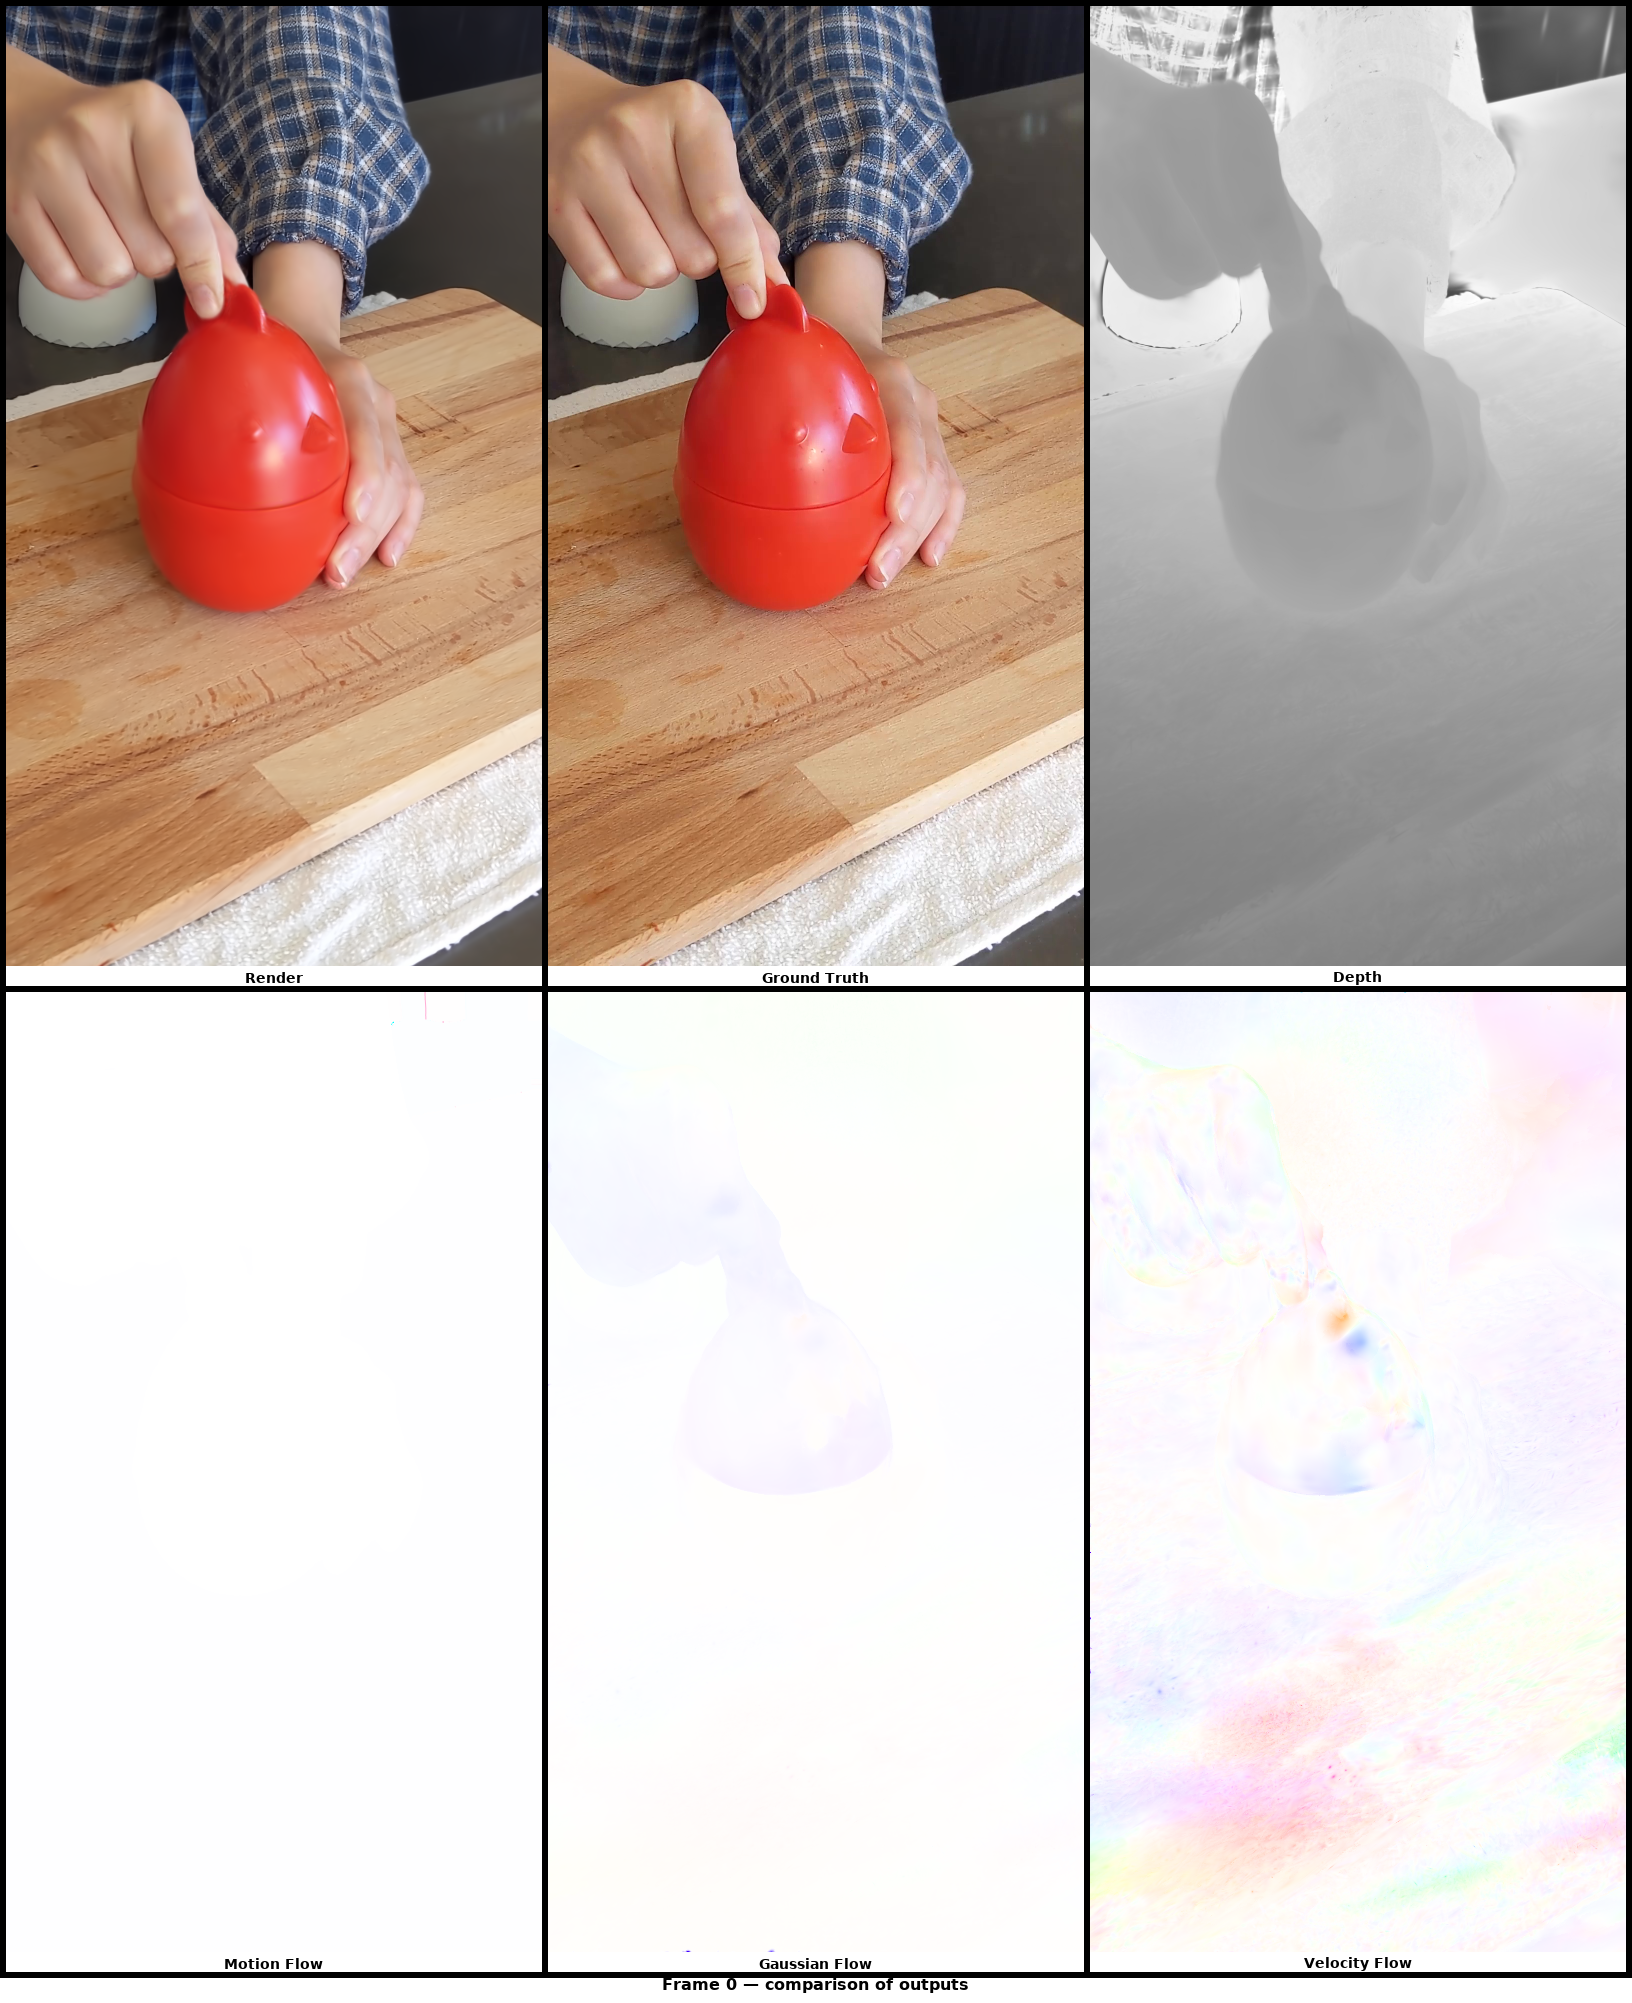

In [3]:
import sys, os, torch
from argparse import ArgumentParser
from IPython.display import display
from PIL import Image, ImageDraw, ImageFont
import torchvision
from tqdm.notebook import tqdm
import time

# imports from your codebase (assumes PYTHONPATH is set so these resolve)
from arguments import ModelParams, PipelineParams, get_combined_args, merge_config
from scene_PIDG import Scene, DeformModel
from gaussian_renderer import GaussianModel, render
from utils.general_utils import safe_state
from utils.flow_utils import vis_flow
from utils.flow_vis_utils import save_vis_flow_tofile

# --- helper to load everything exactly like render.py would ---
def load_rendering_components(model_path, conf_path, iteration="best", device="cuda:0"):
    # backup argv and inject CLI-like args to avoid ipykernel noise
    prev_argv = sys.argv.copy()
    sys.argv = ["render.py", "-m", model_path, "--conf", conf_path, "--iteration", str(iteration)]

    parser = ArgumentParser(description="Testing script parameters")
    model = ModelParams(parser, sentinel=True)
    pipeline = PipelineParams(parser)
    parser.add_argument("--iteration", default=-1)
    parser.add_argument("--skip_train", action="store_true")
    parser.add_argument("--skip_test", action="store_true")
    parser.add_argument("--quiet", action="store_true")
    parser.add_argument("--mode", default="render", choices=["render", "time", "view", "all", "pose", "original"])
    parser.add_argument("--conf", type=str, default=None)  # keep same order as script

    args = get_combined_args(parser)  # now uses our injected sys.argv
    if args.conf is not None and os.path.exists(args.conf):
        args = merge_config(args, args.conf)

    safe_state(getattr(args, "quiet", False))
    args.data_device = "cuda:0" if getattr(args, "data_device", "") == "cuda" else getattr(args, "data_device", "cuda:0")
    torch.cuda.set_device(args.data_device)

    # restore original argv so we don't pollute further cells
    sys.argv = prev_argv

    # extract dataset-like object and pipeline
    dataset = model.extract(args)
    pipeline_params = pipeline.extract(args)

    # build scene / deformation / gaussians
    with torch.no_grad():
        gaussians = GaussianModel(dataset.sh_degree)
        scene = Scene(dataset, gaussians, load_iteration=args.iteration, shuffle=False)
        deform = DeformModel(
            dataset.grid_args, dataset.network_args,
            scale_xyz=dataset.scale_xyz,
            reg_spatial_able=False,
            reg_temporal_able=False,
        )
        deform.load_weights(dataset.model_path, iteration=args.iteration)
        gaussians.velocity_net.load_weights(dataset.model_path, iteration=args.iteration)

        bg_color = [1, 1, 1] if dataset.white_background else [0, 0, 0]
        background = torch.tensor(bg_color, dtype=torch.float32, device=args.data_device)

    return dataset, scene, gaussians, pipeline_params, background, deform, args

# --- render just one view and save identical outputs to render.py's render_set ---
def render_single_frame(
    dataset, scene, gaussians, pipeline, background, deform,
    which="train", view_idx=0
):
    """
    which: "train" or "test"
    """
    with torch.no_grad():
        # pick view
        if which == "train":
            views = scene.getTrainCameras()
        else:
            views = scene.getTestCameras()
        assert len(views) > 0, f"No {which} views available"
        view = views[view_idx]
        # ensure dynamic_mask exists to avoid downstream surprises (fallback: all dynamic)
        if not hasattr(gaussians, "dynamic_mask") or gaussians.dynamic_mask is None:
            N = gaussians.get_xyz.shape[0]
            gaussians.dynamic_mask = torch.ones(N, dtype=torch.bool, device=gaussians.get_xyz.device)

        # call the same-render logic as render_set for a single view
        # mimic render_set but only one index
        model_path = dataset.model_path
        iteration = scene.loaded_iter
        name = which
        # prepare dirs
        base_dir = os.path.join(model_path, name, f"ours_{iteration}")
        paths = {
            "renders": os.path.join(base_dir, "renders"),
            "gt": os.path.join(base_dir, "gt"),
            "depth": os.path.join(base_dir, "depth"),
            "camera_flow": os.path.join(base_dir, "camera_flow"),
            "motion_flow": os.path.join(base_dir, "motion_flow"),
            "gaussian_flow": os.path.join(base_dir, "gaussian_flow"),
            "velocity_flow": os.path.join(base_dir, "velocity_flow"),
        }
        for p in paths.values():
            os.makedirs(p, exist_ok=True)
        speed_path = os.path.join(base_dir, "speed.txt")

        # rendering (single view)
        if getattr(dataset, "load2gpu_on_the_fly", False):
            view.load2device()
        fid = view.fid
        xyz = gaussians.get_xyz
        time_input = fid.unsqueeze(0).expand(xyz.shape[0], -1)
        t0 = time.time()

        # deformation
        d_xyz = torch.zeros((xyz.shape[0], 7), device=xyz.device); d_xyz[:, 0] = 1.0
        d_rotation = torch.zeros((xyz.shape[0], 4), device=xyz.device)
        d_scaling = torch.zeros_like(gaussians.get_scaling)
        deform_pkgs = deform.step(xyz.detach(), time_input, fixed_attention=True)
        d_xyz = deform_pkgs["d_xyz"]
        d_rotation = deform_pkgs["d_rotation"]
        d_scaling = deform_pkgs["d_scaling"]

        # render
        results = render(view, gaussians, pipeline, background, d_xyz, d_rotation, d_scaling, False)
        total_time = time.time() - t0
        rendering = results["render"]
        depth = results["depth"]
        depth = depth / (depth.max() + 1e-5)
        gt = view.original_image[0:3, :, :]

        # save
        idx_str = f"{0:05d}"
        torchvision.utils.save_image(rendering, os.path.join(paths["renders"], idx_str + ".png"))
        torchvision.utils.save_image(gt, os.path.join(paths["gt"], idx_str + ".png"))
        torchvision.utils.save_image(depth, os.path.join(paths["depth"], idx_str + ".png"))

        # flows only for train with next_cam
        if which == "train" and view.next_cam is not None:
            fid_next = view.next_cam.fid
            time_input_next = fid_next.unsqueeze(0).expand(xyz.shape[0], -1)
            deform_pkgs_next = deform.step(gaussians.get_xyz.detach(), time_input_next)
            d_xyz_next = deform_pkgs_next["d_xyz"]
            d_rotation_next = deform_pkgs_next["d_rotation"]
            d_scaling_next = deform_pkgs_next["d_scaling"]

            render_next = render(view, gaussians, pipeline, background, d_xyz_next, d_rotation_next, d_scaling_next, False)
            velocity, _ = gaussians.get_velocity_and_stress(view.fid)
            xyz_t_velocity = d_xyz[..., 4:, None] + velocity.unsqueeze(2) * (view.next_cam.fid - view.fid)
            d_xyz_velocity = torch.cat([d_xyz[..., :4], xyz_t_velocity.squeeze(-1)], dim=-1)
            render_pkg_re_velocity = render(view, gaussians, pipeline, background, d_xyz_velocity, d_rotation, d_scaling, False)
            flow_all = vis_flow(view, results, render_next, render_pkg_re_velocity)

            save_vis_flow_tofile(flow_all["camera_flow"], os.path.join(paths["camera_flow"], idx_str + ".png"))
            save_vis_flow_tofile(flow_all["motion_flow"], os.path.join(paths["motion_flow"], idx_str + ".png"))
            save_vis_flow_tofile(flow_all["gaussian_flow"], os.path.join(paths["gaussian_flow"], idx_str + ".png"))
            save_vis_flow_tofile(flow_all["velocity_flow"], os.path.join(paths["velocity_flow"], idx_str + ".png"))

        # record speed
        fps = 1.0 / total_time if total_time > 0 else 0.0
        with open(speed_path, "w") as f:
            f.write("FPS: " + str(fps))
        print(f"Rendered 1 view ({which}) in {total_time:.3f}s, FPS:{fps:.2f}")

        return paths, iteration

def show_frame_montage_with_labels(
    model_path,
    which,
    iteration,
    index=0,
    nrow=3,
    padding=4,
    per_image_labels=None,    # list of strings to override category names
    global_caption=None,      # string drawn below full grid
    label_bg=(255, 255, 255), # background behind label
):
    categories = [
        "renders", "gt", "depth",
        "motion_flow", "gaussian_flow", "velocity_flow"
    ]
    base = os.path.join(model_path, which, f"ours_{iteration}")
    imgs_pil = []

    # prepare font
    try:
        font = ImageFont.truetype("DejaVuSans-Bold.ttf", size=14)
    except IOError:
        font = ImageFont.load_default()

    # load existing images and labels
    for i, cat in enumerate(categories):
        p = os.path.join(base, cat, f"{index:05d}.png")
        if not os.path.exists(p):
            continue
        img = Image.open(p).convert("RGB")
        label_text = per_image_labels[i] if (per_image_labels and i < len(per_image_labels)) else cat
        imgs_pil.append((img, label_text))

    if not imgs_pil:
        print("No images found to display.")
        return

    # 1. compute max base image size
    max_w = max(img.size[0] for img, _ in imgs_pil)
    max_h = max(img.size[1] for img, _ in imgs_pil)

    # 2. compute uniform label height using textbbox
    dummy_canvas = Image.new("RGB", (10, 10))
    dummy_draw = ImageDraw.Draw(dummy_canvas)
    label_heights = []
    for _, label_text in imgs_pil:
        bbox = dummy_draw.textbbox((0, 0), label_text, font=font)
        text_h = bbox[3] - bbox[1]
        label_heights.append(text_h)
    padding_y = 6  # vertical padding inside label bar
    label_height = max(label_heights) + padding_y

    # 3. build processed tensors with padding + label area
    processed = []
    for img, label_text in imgs_pil:
        # pad base image to (max_w, max_h)
        if img.width != max_w or img.height != max_h:
            base_canvas = Image.new("RGB", (max_w, max_h), (255, 255, 255))
            base_canvas.paste(img, (0, 0))
            img_base = base_canvas
        else:
            img_base = img

        # create new image with extra label area
        new_h = max_h + label_height
        new_img = Image.new("RGB", (max_w, new_h), (255, 255, 255))
        new_img.paste(img_base, (0, 0))

        draw = ImageDraw.Draw(new_img)
        # label background bar
        draw.rectangle([0, max_h, max_w, new_h], fill=label_bg)
        # draw centered label text
        bbox_lbl = draw.textbbox((0, 0), label_text, font=font)
        text_w = bbox_lbl[2] - bbox_lbl[0]
        text_h = bbox_lbl[3] - bbox_lbl[1]
        x_text = (max_w - text_w) // 2
        y_text = max_h + (label_height - text_h) // 2
        draw.text((x_text, y_text), label_text, fill=(0, 0, 0), font=font)

        # to tensor
        tensor = torchvision.transforms.ToTensor()(new_img)
        processed.append(tensor)

    # 4. make grid
    grid = torchvision.utils.make_grid(processed, nrow=nrow, padding=padding)
    grid_pil = torchvision.transforms.ToPILImage()(grid)

    # 5. optional global caption (fix: use its own draw to measure)
    if global_caption:
        try:
            caption_font = ImageFont.truetype("DejaVuSans-Bold.ttf", size=16)
        except IOError:
            caption_font = font
        draw_caption = ImageDraw.Draw(grid_pil)
        bbox2 = draw_caption.textbbox((0, 0), global_caption, font=caption_font)
        caption_w = bbox2[2] - bbox2[0]
        caption_h = bbox2[3] - bbox2[1]
        caption_padding = 10
        combined_h = grid_pil.height + caption_h + caption_padding
        combined = Image.new("RGB", (grid_pil.width, combined_h), (255, 255, 255))
        combined.paste(grid_pil, (0, 0))
        draw_combined = ImageDraw.Draw(combined)
        x_cap = (grid_pil.width - caption_w) // 2
        y_cap = grid_pil.height + (caption_padding - caption_h) // 2
        draw_combined.text((x_cap, y_cap), global_caption, fill=(0, 0, 0), font=caption_font)
        display(combined)
    else:
        display(grid_pil)
        
dataset, scene, gaussians, pipeline, background, deform, args = load_rendering_components(
    model_path="./outputs/HyperNeRF-pidg/vrig/chicken-single",
    conf_path="./arguments/hypernerf/vrig_chicken.py",
    iteration="best",
    device="cuda:0"
)

paths, loaded_iter = render_single_frame(dataset, scene, gaussians, pipeline, background, deform,
                                        which="train", view_idx=0)

show_frame_montage_with_labels(
    model_path=dataset.model_path,
    which="train",
    iteration=loaded_iter,
    index=0,
    nrow=3,
    padding=6,
    per_image_labels=["Render", "Ground Truth", "Depth", "Motion Flow", "Gaussian Flow", "Velocity Flow"],
    global_caption="Frame 0 — comparison of outputs"
)